In [89]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import random

Go to <a href=#bookmark>where you left last time</a>

In [40]:
# load data
data = pickle.load(open("data.p", "rb"))
print("data loaded")

data loaded


In [41]:
#data

In [42]:
imprisonment = []
detention = []
suspended = []
fines = []
imprisonment_count = 0
detention_count = 0
suspended_count = 0
fines_count = 0

total_count = 0

for cases in data:
    for decision in cases:
        decision_lst = list(decision.keys())
        for penalty in decision_lst:
#             print(penalty)
#             print(decision[penalty])
#             print(penalty == "有期徒刑")
            if (penalty == "免予处罚") and (decision[penalty]):
                pass
            elif penalty == "有期徒刑":
                imprisonment.append(decision[penalty])
                imprisonment_count += 1
                total_count += 1
            elif penalty == "罚金":
                fines.append(decision[penalty])
                fines_count += 1
                total_count += 1
            elif penalty == "缓刑":
                suspended.append(decision[penalty])
                suspended_count += 1
                total_count += 1
            elif penalty == "拘役":
                detention.append(decision[penalty])
                detention_count += 1
                total_count += 1
print(imprisonment)
print()
print(detention)
print()
print(suspended)
print()
print(fines)

['六个月', '十个月', '一年', '八个月', '六个月', '八个月', '六个月', '十个月', '八个月', '六个月', '一年', '十一个月', '九个月', '九个月', '六个月', '四年六个月', '三年', '四年', '二年', '二年', '二年', '二年', '二年', '一年六个月', '一年', '一年', '六个月', '一年', '二年', '九个月', '六个月', '七个月', '一年', '一年', '六个月', '九个月', '七个月', '八个月', '十个月', '十个月', '六个月', '六个月', '一年六个月', '一年二个月', '十个月', '一年', '六个月', '八个月', '六个月', '一年', '一年六个月', '八个月', '八个月', '六个月', '一年', '一年', '十个月', '六个月', '六个月', '六个月', '一年二个月', '一年', '八个月', '十个月', '一年六个月', '一年六个月', '一年零六个月', '六个月', '四年六个月', '四年三个月', '四年', '四年五个月', '一年一个月', '一年', '五年', '四年六个月', '四年六个月', '十个月', '六个月', '一年', '一年', '一年六个月', '一年', '一年', '一年', '一年', '八个月', '八个月', '七个月', '一年', '十一个月', '十一个月', '十一个月', '十一个月', '一年六个月', '七个月', '二年', '一年', '六个月', '十个月', '一年', '七个月', '一年零六个月', '七个月', '六个月', '一年四个月', '一年', '一年', '六个月', '一年', '六个月', '一年', '一年六个月', '一年', '十个月', '十个月', '一年', '十个月', '一年二个月', '八个月', '二年', '一年缓刑一年六个月', '十个月缓刑一年三个月', '十个月', '八个月', '二年', '十个月', '二年', '九个月', '六个月', '六个月', '六个月', '八个月', '二年六个月', '一年六个月', '十个月', '六个月缓刑一年', '一年二个月', '一年

In [43]:
fines[3300:4000]

['10000元',
 '人民币五千元',
 '人民币五千元',
 '人民币10000元',
 '人民币6000元',
 '5000元',
 '人民币一万元',
 '人民币五万元',
 '人民币二万元',
 '人民币一万元',
 '人民币10000元',
 '人民币10000元',
 '人民币10000元',
 '人民币12000元',
 '人民币一万元',
 '人民币一万元',
 '人民币10000元',
 '人民币8000元',
 '人民币6000元',
 '人民币二万元',
 '500000元',
 '300000元',
 '人民币二万元',
 '人民币6000元',
 '人民币6000元',
 '人民币二万元',
 '三万元',
 '2000元',
 '人民币十二万元',
 '人民币20000元',
 '人民币五千元',
 '人民币1000元',
 '人民币一万元',
 '人民币二万元',
 '人民币五万元',
 '二万五千元',
 '人民币六千元',
 '人民币五千元',
 '人民币五千元',
 '人民币10000元',
 '人民币三万元',
 '人民币二万元',
 '人民币5000元',
 '人民币20000元',
 '人民币五千元',
 '人民币10000元',
 '人民币三千元',
 '人民币二万元',
 '人民币五千元',
 '人民币五千元',
 '1万元',
 '5000元',
 '人民币五千元',
 '一万元',
 '人民币一万元',
 '人民币三万元',
 '人民币五千元',
 '三万元',
 '人民币二万五千元',
 '人民币五千元',
 '人民币一万元',
 '人民币四万元',
 '人民币四万元',
 '人民币40000元',
 '二万五千元',
 '人民币10000元',
 '人民币10000元',
 '人民币五万元',
 '人民币五千元',
 '人民币五千元',
 '人民币七万元',
 '人民币六万元',
 '人民币三万元',
 '二万元',
 '人民币二十万元',
 '人民币十万元',
 '人民币十万元',
 '人民币三万元',
 '人民币一万元',
 '人民币四千元',
 '人民币十五万元',
 '人民币十万元',
 '人民币15000元',
 '人民币5000元',
 '人民币20000元',
 '人民币10000元',
 '人

In [44]:
# create character number to int number dictionary
char = ["零", "一", "二", "三", "四", "五", "六", "七", "八", "九", "十"]
char_sub = ["壹", "贰", "叁", "肆", "伍", "陆", "柒", "捌", "玖", "拾"]
char_num = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
char2num_sub = dict([(value, key+1) for key, value in dict(enumerate(char_sub)).items()])
char2num = dict([(value, key) for key, value in dict(enumerate(char)).items()])
char2num_num = dict([(value, key) for key, value in dict(enumerate(char_num)).items()])
char2num["两"] = 2
char2num["万"] = 10000
char2num["千"] = 1000
char2num["仟"] = 1000
char2num["百"] = 100
char2num.update(char2num_sub)
char2num.update(char2num_num)
char2num

{'零': 0,
 '一': 1,
 '二': 2,
 '三': 3,
 '四': 4,
 '五': 5,
 '六': 6,
 '七': 7,
 '八': 8,
 '九': 9,
 '十': 10,
 '两': 2,
 '万': 10000,
 '千': 1000,
 '仟': 1000,
 '百': 100,
 '壹': 1,
 '贰': 2,
 '叁': 3,
 '肆': 4,
 '伍': 5,
 '陆': 6,
 '柒': 7,
 '捌': 8,
 '玖': 9,
 '拾': 10,
 '0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '10': 10}

In [45]:
def find_year_month(i):
    year_num, month_num = 0, 0
    try:
        if "缓刑" in i:
            decision = i.split("缓刑")[1]
        else:
            decision = i
        if ("年" in decision) and ("月" in decision):
            # convert string to list, and iterate the list to find year number
            year_char = decision.split("年")[0]
            if len(year_char) > 1:
                raise ValueError('year_char is more then 10 years')
            for k in list(year_char):
                year_num += char2num[k]

            # same idea as above, find month number
            month_char = decision.split("年")[1].split("月")[0]
            month_char = month_char.split("个")[0]
            for j in list(month_char):
                month_num += char2num[j]
        elif ("年" in decision) and ("月" not in decision):
            year_char = decision.split("年")[0]
            if len(year_char) > 1:
                raise ValueError('year_char is more then 10 years')
            for k in list(year_char):
                year_num += char2num[k]
        elif ("年" not in decision) and ("月" in decision):
            month_char = decision.split("月")[0]
            month_char = month_char.split("个")[0]
            # handle string integer
            try:
                month_num = int(month_char)
            except:
                for j in list(month_char):
                    month_num += char2num[j]
    except:
        pass
    return {'year':year_num, 'month':month_num}

In [46]:
#fines

In [47]:
def find_detention(i):
    month_num, day_num = 0, 0
    try:
        if "缓刑" in i:
            decision = i.split("缓刑")[0]
        else:
            decision = i
        if "月" in decision:
            # convert string to list, and iterate the list to find month number
            month_char = decision.split("月")[0]
            month_char = month_char.split("个")[0]
            for k in list(month_char):
                month_num += char2num[k]
                
            # same idea as above, find day number
            if "天" in decision:
                day_char = decision.split("月")[1].split("天")[0]
                for j in list(day_char):
                    day_num += char2num[j]
            elif "日" in decision:
                day_char = decision.split("月")[1].split("日")[0]
                for j in list(day_char):
                    day_num += char2num[j]
        elif ("天" in decision) and ("月" not in decision):
            day_char = decision.split("月")[1].split("天")[0]
            for j in list(day_char):
                day_num += char2num[j]
        elif ("日" in decision) and ("月" not in decision):
            day_char = day_char.split("日")[0]
            for j in list(day_char):
                day_num += char2num[j]
#             # handle integer string
#             try:
#                 month_num = int(month_char)
#             except:
#                 for j in list(month_char):
#                     month_num += char2num[j]
    except:
        pass
    return {'month':month_num, 'day':day_num}

In [48]:
# chinese2digits credit to zhengdan66
def chinese2digits(uchars_chinese):
    total = 0
    r = 1 
    for i in range(len(uchars_chinese) - 1, -1, -1):
        val = char2num.get(uchars_chinese[i])
        if val >= 10 and i == 0:  
            if val > r:
                r = val
                total = total + val
            else:
                r = r * val
                # total =total + r * x
        elif val >= 10:
            if val > r:
                r = val
            else:
                r = r * val
        else:
            total = total + r * val
    return total

def find_fines(i):
    fine_num = 0
    if "元" in i:
        if "人民币" in i:
            fine_char = i.split("人民币")[1]
        elif "人民" in i:
            fine_char = i.split("人民")[1]
        elif "共计" in i:
            fine_char = i.split("共计")[1]
        else:
            fine_char = i
        fine_char = fine_char.split("元")[0]
        if "," in fine_char:
                fine_char = fine_char.split(",")
                fine_char = "".join(fine_char)
        if "." in fine_char:
            if fine_char[-1] != '万':
                fine_char = fine_char.split(".")[0]
            else:
                fine_char = float(fine_char[:len(fine_char)-1])*10000

        # handle integer string
        try:
            fine_num = int(fine_char)
        except:
            if (fine_char is not "") and (fine_char[-1] == '万'):
                fine_num = 10000*(chinese2digits(fine_char[:len(fine_char)-1]))
            else:
                fine_num = chinese2digits(fine_char)
    else:
        pass
    if fine_num == 10080500000:
        print(i)
    return {"fine":fine_num}

In [49]:
detention_result = []
for i in detention:
    m = find_detention(i)
    if (m['day'] != 0) or (m['month'] != 0):
        detention_result.append(m)
# detention_result

In [50]:
suspended_result = []
for i in suspended:
    m = find_year_month(i)
    if (m['year'] != 0) or (m['month'] != 0):
        suspended_result.append(m)
#suspended_result

In [51]:
imprisonment_result = []
for i in imprisonment:
    m = find_year_month(i)
    if (m['year'] != 0) or (m['month'] != 0):
        imprisonment_result.append(m)
#imprisonment_result

In [52]:
fines_result = []
for i in fines:
    m = find_fines(i)
    if m['fine'] != 0:
        fines_result.append(m)
#fines_result

In [53]:
chinese2digits('一千八百五十万')

10080500000

In [54]:
print(len(fines_result))
print(len(fines))

11044
11110


---
## Data analysis

Build a result table that shows the statistics of the data

In [55]:
# convert all dict list to numerical list
y = []
m = []
d = []
imprisonment_arr = []
detention_arr = []
suspended_arr = []
for c in imprisonment_result:
    y.append(c['year'])
    m.append(c['month'])
    imprisonment_arr.append(c['year'] * 12 + c['month'])
imprisonment_arr = np.array(imprisonment_arr)

for c in detention_result:
    d.append(c['day'])
    m.append(c['month'])
    detention_arr.append(c['month'] * 30 + c['day'])
detention_arr = np.array(detention_arr)

for c in suspended_result:
    y.append(c['year'])
    m.append(c['month'])
    suspended_arr.append(c['year'] * 12 + c['month'])
suspended_arr = np.array(suspended_arr)

fine_arr = np.array([i['fine'] for i in fines_result])
all_arr = [imprisonment_arr, suspended_arr, detention_arr, fine_arr]


In [56]:
# helper function
def add_comma(s):
    count = 0
    result = ''
    if len(s) < 1:
        return result
    if '.' in s:
        return add_comma(s.split('.')[0]) + '.' + s.split('.')[1]
    for i in range(1, len(s)+1):
        if count == 3:
            result = ',' + result
            count = 0
        result = s[-i] + result
        count += 1
    return result

In [57]:
i_stats_result = []
total_stats_result = []

for i_arr in all_arr:
    i_max = np.max(i_arr)
    i_min = np.min(i_arr)
    i_mean = np.around(np.mean(i_arr), decimals=2)
    i_median = np.median(i_arr)
    i_std = np.around(np.std(i_arr), decimals=2)
    i_mode = str(stats.mode(i_arr)[0][0]) + ", count: " + str(stats.mode(i_arr)[1][0])
    i_stats_result = [i_max, i_min, i_mean, i_median, i_std, i_mode]
    total_stats_result.append(i_stats_result)
df = pd.DataFrame(np.array(total_stats_result),columns=['max', 'min', 'mean', 'median', 'std', 'mode'])
df

,max,min,mean,median,std,mode
0,120,4,12.33,10.0,7.87,"12, count: 1768"
1,60,2,16.29,12.0,8.54,"12, count: 1761"
2,180,30,130.36,120.0,36.65,"150, count: 446"
3,18500000,1000,35070.22,14000.0,219958.28,"10000, count: 2487"


In [58]:
df.rename(index={0:'imprisonment', 1:'suspended', 2:'detention', 3:'fine'}, inplace=True)

# find penalty ratio in the data
imprisonment_ratio = np.around((imprisonment_count/total_count)*100, decimals=2)
suspended_ratio = np.around((suspended_count/total_count)*100, decimals=2)
detention_ratio = np.around((detention_count/total_count)*100, decimals=2)
fines_ratio = np.around((fines_count/total_count)*100, decimals=2)

for j in range(2):
    for i in range(len(df.iloc[j]) - 1):
        df.iloc[j][i] = df.iloc[j][i] + " months"
    # df.iloc[0][0] = df.iloc[0][0] + "月"
for i in range(len(df.iloc[2]) - 1):
    df.iloc[2][i] = df.iloc[2][i] + " days"
for i in range(len(df.iloc[3]) - 1):
    df.iloc[3][i] = add_comma(df.iloc[3][i]) + " CNY"
df.iloc[0][5] = df.iloc[0][5][:2] + " months" + df.iloc[0][5][2:]
df.iloc[1][5] = df.iloc[1][5][:2] + " months" + df.iloc[1][5][2:]
df.iloc[2][5] = df.iloc[2][5][:3] + " days" + df.iloc[2][5][3:]
df.iloc[3][5] = df.iloc[3][5][:5] + " CNY" + df.iloc[3][5][5:]
df.insert(6, 'ratio(%)', np.array([imprisonment_ratio, suspended_ratio, detention_ratio, fines_ratio]))
df

,max,min,mean,median,std,mode,ratio(%)
imprisonment,120 months,4 months,12.33 months,10.0 months,7.87 months,"12 months, count: 1768",35.49
suspended,60 months,2 months,16.29 months,12.0 months,8.54 months,"12 months, count: 1761",15.50
detention,180 days,30 days,130.36 days,120.0 days,36.65 days,"150 days, count: 446",6.04
fine,"18,500,000 CNY","1,000 CNY","35,070.22 CNY","14,000.0 CNY","219,958.28 CNY","10000 CNY, count: 2487",42.97


---
## Data Visualization

### Imprisonment

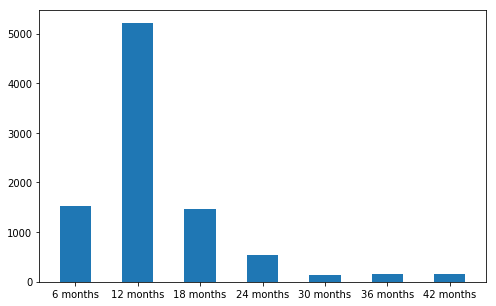

[1522, 5213, 1458, 531, 133, 160, 150]


In [59]:
imprisonment_label = ["6 months", "12 months", "18 months", "24 months", "30 months",
                      "36 months", "42 months"]
imprisonment_value = []
for i in range(1, 7):
    imprisonment_value.append(len([n for n in imprisonment_arr if n <= i*6 and n > (i-1)*6]))
imprisonment_value.append(len([n for n in imprisonment_arr if n > (6)*6]))
plt.figure(figsize=(8, 5))
plt.bar(imprisonment_label, imprisonment_value, width=0.5)
plt.show()
print(imprisonment_value)

### Suspended

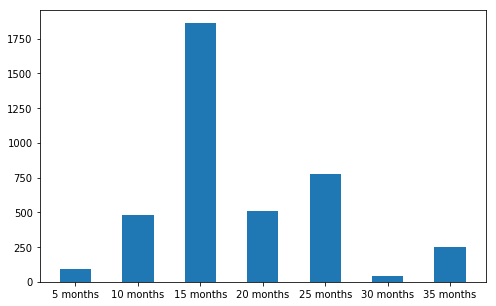

[91, 481, 1862, 507, 772, 40, 249]


In [60]:
suspended_label = ["5 months", "10 months", "15 months", "20 months", "25 months",
                      "30 months", "35 months"]
suspended_value = []
for i in range(1, 7):
    suspended_value.append(len([n for n in suspended_arr if n <= i*5 and n > (i-1)*5]))
suspended_value.append(len([n for n in suspended_arr if n > 7*5]))
plt.figure(figsize=(8, 5))
plt.bar(suspended_label, suspended_value, width=0.5)
plt.show()
print(suspended_value)

### Detention

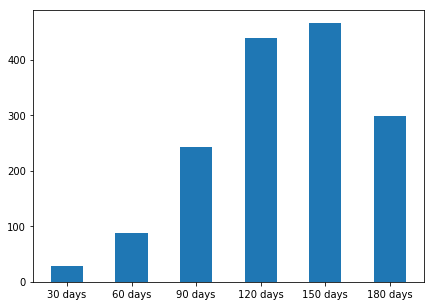

[29, 87, 242, 438, 466, 299]


In [61]:
detention_label = ["30 days", "60 days", "90 days", "120 days", "150 days",
                      "180 days"]
detention_value = []
for i in range(1, 7):
    detention_value.append(len([n for n in detention_arr if n <= i*30 and n > (i-1)*30]))
plt.figure(figsize=(7, 5))
plt.bar(detention_label, detention_value, width=0.5)
plt.show()
print(detention_value)

### Fine

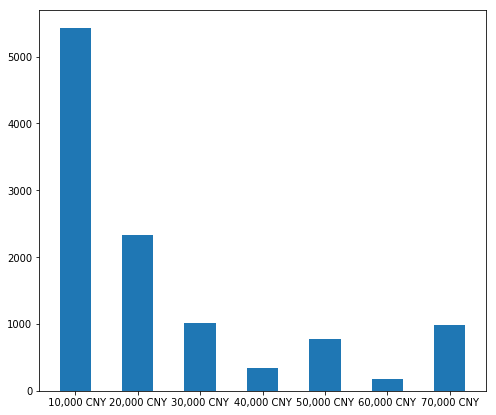

[5421, 2328, 1019, 337, 771, 181, 987]


In [62]:
fine_label = [" 10,000 CNY", "20,000 CNY", "30,000 CNY", "40,000 CNY", "50,000 CNY",
                      "60,000 CNY", "70,000 CNY"]
fine_value = []
for i in range(1, 7):
    fine_value.append(len([n for n in fine_arr if n <= i*10000 and n > (i-1)*10000]))
fine_value.append(len([n for n in fine_arr if n > 6*10000]))
plt.figure(figsize=(8, 7))
plt.bar(fine_label, fine_value, width=0.5)
plt.show()
print(fine_value)

---
### Data analysis for individual and for company

In [63]:
# find company defendent
data_company = [j for i in data for j in i if '被告单位' in j.keys()]
# data_company

In [64]:
# find individual defendent
data_individual = [j for i in data for j in i if '被告人' in j.keys()]
# data_individual 

In [65]:
print("number of companies involved: ", len(data_company))
print("number of people involved: ", len(data_individual))

number of companies involved:  449
number of people involved:  10504


In [66]:
# company result
fines = []
for decision in data_company:
    decision_lst = list(decision.keys())
    for penalty in decision_lst:
        if (penalty == "免予处罚") and (decision[penalty]):
            pass
        elif penalty == "罚金":
            fines.append(decision[penalty])
company_fines_result = []
for i in fines:
    m = find_fines(i)
    if m['fine'] != 0:
        company_fines_result.append(m)
company_fine_arr = np.array([i['fine'] for i in company_fines_result])
# company_fine_arr

In [67]:
# person result
fines = []
for decision in data_individual:
    decision_lst = list(decision.keys())
    for penalty in decision_lst:
        if (penalty == "免予处罚") and (decision[penalty]):
            pass
        elif penalty == "罚金":
            fines.append(decision[penalty])
individual_fines_result = []
for i in fines:
    m = find_fines(i)
    if m['fine'] != 0:
        individual_fines_result.append(m)
individual_fine_arr = np.array([i['fine'] for i in individual_fines_result])
# individual_fine_arr

In [68]:
# find statistical data
company_max = np.max(company_fine_arr)
company_min = np.min(company_fine_arr)
company_mean = np.around(np.mean(company_fine_arr), decimals=2)
company_median = np.median(company_fine_arr)
company_std = np.around(np.std(company_fine_arr), decimals=2)
company_mode = str(stats.mode(company_fine_arr)[0][0]) + ", count: " + str(stats.mode(company_fine_arr)[1][0])
company_stats_result = [company_max, company_min, company_mean, company_median, company_std, company_mode]

individual_max = np.max(individual_fine_arr)
individual_min = np.min(individual_fine_arr)
individual_mean = np.around(np.mean(individual_fine_arr), decimals=2)
individual_median = np.median(individual_fine_arr)
individual_std = np.around(np.std(individual_fine_arr), decimals=2)
individual_mode = str(stats.mode(individual_fine_arr)[0][0]) + ", count: " + str(stats.mode(individual_fine_arr)[1][0])
individual_stats_result = [individual_max, individual_min, individual_mean, individual_median, individual_std, individual_mode]

fines_df = pd.DataFrame(np.array([company_stats_result, individual_stats_result]),columns=['max', 'min', 'mean', 'median', 'std', 'mode'])

# modify the table for better visualization
for index, j in fines_df.iterrows():
    for i in range(len(fines_df.iloc[index]) - 1):
        fines_df.iloc[index][i] = add_comma(fines_df.iloc[index][i]) + " CNY"
    fines_df.iloc[index][5] = add_comma(fines_df.iloc[index][5][:5]) + " CNY" + fines_df.iloc[index][5][5:]
fines_df.rename(index={0:'company fines', 1:'individual fines'}, inplace=True)
fines_df

,max,min,mean,median,std,mode
company fines,"18,500,000 CNY","5,000 CNY","258,145.65 CNY","80,000.0 CNY","1,043,162.85 CNY","50,000 CNY, count: 76"
individual fines,"2,100,000 CNY","1,000 CNY","25,552.96 CNY","10,000.0 CNY","51,742.18 CNY","10,000 CNY, count: 2331"


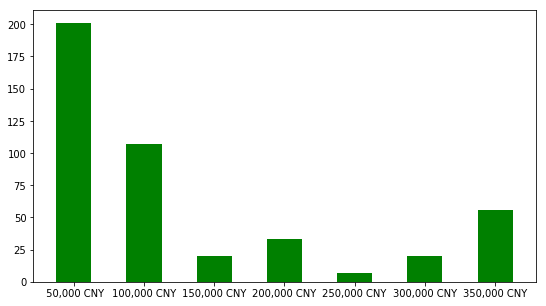

[201, 107, 20, 33, 7, 20, 56]


In [69]:
company_fine_label = [" 50,000 CNY", "100,000 CNY", "150,000 CNY", "200,000 CNY", "250,000 CNY",
                      "300,000 CNY", "350,000 CNY"]
company_fine_value = []

for i in range(1, 7):
    company_fine_value.append(len([n for n in company_fine_arr if n <= i*50000 and n > (i-1)*50000]))
company_fine_value.append(len([n for n in company_fine_arr if n > 6*50000]))
    
plt.figure(figsize=(9, 5))
# ax = plt.subplot(111)
# ax.bar(fine_label, company_fine_value)
# ax.bar(fine_label, individual_fine_value)
plt.bar(company_fine_label, company_fine_value, color='g', width=0.5)
plt.show()
print(company_fine_value)

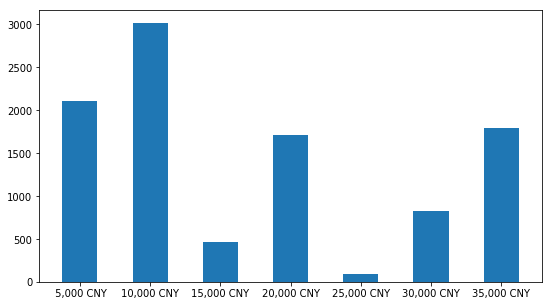

[2101, 3015, 461, 1710, 94, 828, 1794]


In [70]:
individual_fine_label = [" 5,000 CNY", "10,000 CNY", "15,000 CNY", "20,000 CNY", "25,000 CNY",
                      "30,000 CNY", "35,000 CNY"]

individual_fine_value = []
for i in range(1, 7):
    individual_fine_value.append(len([n for n in individual_fine_arr if n <= i*5000 and n > (i-1)*5000]))
individual_fine_value.append(len([n for n in individual_fine_arr if n > 6*5000]))

plt.figure(figsize=(9, 5))
plt.bar(individual_fine_label, individual_fine_value, width=0.5)
plt.show()
print(individual_fine_value)

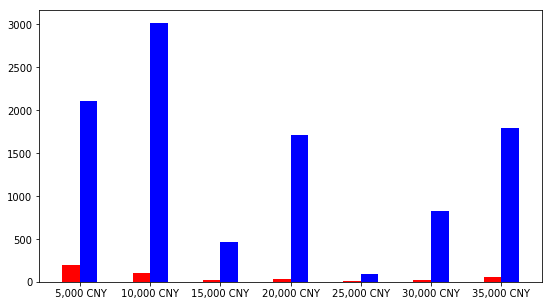

In [71]:
plt.figure(figsize=(9, 5))
ax = plt.subplot(111)
wid = 0.25
com = [i - wid/2 for i in range(1, 8)]
ind = [i + wid/2 for i in range(1, 8)]


ax.bar(com, company_fine_value, color='r', width=wid)
ax.bar(ind, individual_fine_value, color='b', width=wid)
plt.xticks(np.arange(1, 8), individual_fine_label)

plt.show()

---
### Find top 5 companies that pay the most fine

In [72]:
fine_arr.sort()
top_5 = [fine_arr[-i] for i in range(1, 6)]
top_5

[18500000, 8000000, 5000000, 5000000, 2450000]

In [73]:
top_5_decision = []
for cases in data:
    for decision in cases:
        decision_lst = list(decision.keys())
        for penalty in decision_lst:
            if penalty == "罚金":
                num_fine = find_fines(decision[penalty])
#                 print(num_fine['fine'])
                if num_fine['fine'] in top_5:
                    top_5_decision.append(decision)
top_5_decision[4]['被告单位'] = '宁夏某某染化有限公司'
top_5_decision

[{'被告单位': '瑞安宝源化工有限公司', '罚金': '人民币8000000元', 'pid': 17078470},
 {'被告单位': '无锡双象超纤材料股份有限公司', '罚金': '人民币五百万元', 'pid': 14973975},
 {'被告单位': '某某（河北）焦化有限公司', '罚金': '人民币二百四十五万元', 'pid': 28286322},
 {'被告单位': '某', '罚金': '人民币一千八百五十万元', 'pid': 18390772},
 {'被告单位': '宁夏某某染化有限公司', '罚金': '人民币五百万元', 'pid': 4080709}]

In [80]:
pollution_df = pd.read_csv("pollution_data/pollution_original_parsed_utf-8.csv")

row = pollution_df.where(pollution_df['pid'] == 4080709).dropna()
row

,pid,court,std_court,decision_date,converted_date,start_date,converted_start,year_id,case_number_id,title,...,laws_statute,laws_full,parties,case_id,type,filename,case_type_org,province,originaltext,segmentedtext
4780,4080709.0,中卫市沙坡头区人民法院,中卫市沙坡头区人民法院,二〇一五年四月二十九日,2015-04-29,2015年2月3日,2015-02-03,2015.0,49,宁夏某某染化有限公司、廉某某污染环境案一审刑事判决书,...,"{《中华人民共和国刑法》第三百三十八条,《中华人民共和国刑法》第三百四十六条,《中华人民共和...","{《中华人民共和国刑法》第三百三十八条,《中华人民共和国刑法》第三百四十六条,《中华人民共和...","{公诉机关宁夏回族自治区中卫市沙坡头区人民检察院。,被告单位宁夏某某染化有限公司。,诉讼代表...",（2015）沙刑初字第49号,刑事判决书,（2015）沙刑初字第49号_1ea61868-36bd-4203-95c0-d09b24...,刑事案件,宁夏,宁夏某某染化有限公司、廉某某污染环境案一审刑事判决书\n宁夏回族自治区中卫市沙坡头区人民法...,宁夏 某某 染化有限公司 廉某某 污染 环境 案 一审 刑事 判决书 宁夏 回族 自治区...


In [81]:
print(pollution_df['originaltext'][4780])

 宁夏某某染化有限公司、廉某某污染环境案一审刑事判决书
宁夏回族自治区中卫市沙坡头区人民法院
刑 事 判 决 书
（2015）沙刑初字第49号
公诉机关宁夏回族自治区中卫市沙坡头区人民检察院。
被告单位宁夏某某染化有限公司。
诉讼代表人廉某甲，男，生于1976年3月6日，系宁夏某某染化有限公司职工。
被告人廉某某，男，生于1964年4月8日，汉族，大专文化，系宁夏某某染化有限公司法定代表人，户籍所在地：江苏省无锡市，现住宁夏某某染化有限公司职工宿舍。2014年12月18日因涉嫌犯污染环境罪被宁夏回族自治区中卫市公安局沙坡头区分局取保候审。2014年12月19日由宁夏回族自治区中卫市沙坡头区人民检察院取保候审。2015年2月4日本院决定取保候审。
宁夏回族自治区中卫市沙坡头区人民检察院以卫沙检刑诉（2015）44号起诉书指控被告单位宁夏某某染化有限公司、被告人廉某某犯污染环境罪，于2015年2月3日向本院提起公诉。本院依法组成合议庭，于2015年3月25日公开开庭审理了本案。宁夏回族自治区中卫市沙坡头区人民检察院指派检察员徐家全出庭支持公诉，被告单位宁夏某某染化有限公司的诉讼代表人廉某甲、被告人廉某某到庭参加了诉讼。现已审理终结。
宁夏回族自治区中卫市沙坡头区人民检察院起诉指控，2007年以来，被告单位宁夏某某染化有限公司在废水处理措施未经环境影响评估，未经申报登记、验收的情况下，擅自在厂区外东侧腾格里沙漠采用“石灰中和法”处置工业废水。2009年6月18日，被告人廉某某任宁夏某某染化有限公司法定代表人，负责公司的全面工作并决定继续使用“石灰中和法”处置工业废水。经被告人廉某某同意由朱某某（另行处理）安排工人处置工业废水。宁夏某某染化有限公司排污许可证于2014年4月30日到期后，该公司仍继续非法排污。至2014年9月被责令关闭停产时，该公司厂区外东侧腾格里沙漠渗坑内存有大量工业废水。经宁夏环境监测中心站对现场废水取样检测认定，废水中多项监测因子超过国家排放标准。为防止污染扩大，消除污染而采取合理必要措施所产生的费用626640元。
案发后，被告单位宁夏某某染化有限公司、被告人廉某某及时采取措施，消除污染。
据此，公诉机关指控被告单位宁夏某某染化有限公司、被告人廉某某违反国家规定，非法排放、处置有毒物质，严重污染环境，致使公私财产损失626640元，其行为触犯《中华人

---
## Find defendents that actually go to jail
Imprisonment time is longer than suspended time

In [122]:
suspended_time = 0
imprisonment_time = 0
year_month = 0
go_jail = []
no_jail = []
for cases in data:
    for decision in cases:
        decision_lst = list(decision.keys())
        for penalty in decision_lst:
            if penalty == "缓刑":
                year_month = find_year_month(decision[penalty])
                suspended_time = year_month['year'] * 12 + year_month['month']
            elif penalty == "有期徒刑":
                year_month = find_year_month(decision[penalty])
                imprisonment_time = year_month['year'] * 12 + year_month['month']
        if suspended_time > imprisonment_time:
            no_jail.append(decision)
        else:
            go_jail.append(decision)
print("number of defendents that actually go to jail: ", len(go_jail))
print("number of defendents that don't go to jail: ", len(no_jail))

number of defendents that actually go to jail:  3658
number of defendents that don't go to jail:  7925


---
## Find occupation of defendents (if data avialable)

In [4]:
# load occupation data
occupation_df = pd.read_csv('./pollution_data/pollution_utf-8.csv')
#occupation_df

/Users/lyb/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6,35,38,41,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
for cases in data:
    for decision in cases:
        decision_lst = list(decision.keys())
        try:
            defendent = decision['被告人']
        except:
            defendent = None
        for penalty in decision_lst:
            if penalty == 'pid' and defendent is not None:
                row = occupation_df.loc[(occupation_df['Id'] == decision[penalty]) & (occupation_df['Name'] == defendent)]['Position'].dropna()
                if len(row) > 0:
                    occupation = row.iloc[0]
                    decision['职业'] = occupation
                    print(decision)


{'被告人': '陈某', '拘役': '四个月', '罚金': '五千元', 'pid': 28511110, '职业': '群众'}
{'被告人': '林汉强', '有期徒刑': '一年', '罚金': '三万元', 'pid': 29337046, '职业': '农民'}
{'被告人': '陈某甲', '有期徒刑': '八个月', '罚金': '二万元', 'pid': 29337046, '职业': '农民'}
{'被告人': '林某', '有期徒刑': '六个月', '罚金': '二万元', 'pid': 29337046, '职业': '农民'}
{'被告人': '李某', '有期徒刑': '八个月', '罚金': '20000元', 'pid': 28286594, '职业': '群众'}
{'被告人': '马登军', '有期徒刑': '一年', '罚金': '人民币五万元', 'pid': 18445053, '职业': '农民'}
{'被告人': '张海修', '有期徒刑': '十一个月', '罚金': '人民币四万五千元', 'pid': 18445053, '职业': '农民'}
{'被告人': '曾阳', '有期徒刑': '九个月', '罚金': '人民币四万元', 'pid': 18445053, '职业': '职工'}
{'被告人': '徐建良', '有期徒刑': '九个月', '罚金': '人民币四万元', 'pid': 18445053, '职业': '农民'}
{'被告人': '余新华', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币二万元', 'pid': 18445053, '职业': '职工'}
{'被告人': '王甲', '有期徒刑': '六个月', '罚金': '人民币一万元', 'pid': 27118957, '职业': '农民'}
{'被告人': '周某', '有期徒刑': '七个月', '罚金': '人民币一万元', 'pid': 14556078, '职业': '农民'}
{'被告人': '王品妹', '有期徒刑': '一年', '缓刑': '一年', '罚金': '人民币三千元', 'pid': 12946228, '职业': '无业'}
{'被告人': '陈向忠', '有期徒刑'

{'被告人': '石远良', '有期徒刑': '八个月', '罚金': '人民币三千元', 'pid': 22123069, '职业': '劳务人员'}
{'被告人': '林某', '有期徒刑': '八个月', '罚金': '人民币8000元', 'pid': 18148928, '职业': '无业'}
{'被告人': '刘某甲', '有期徒刑': '一年八个月', '罚金': '人民币二万元', 'pid': 18362638, '职业': '农民'}
{'被告人': '郭某', '有期徒刑': '一年四个月', '罚金': '人民币一万元', 'pid': 18362638, '职业': '农民'}
{'被告人': '王某甲', '有期徒刑': '一年二个月', '罚金': '人民币一万元', 'pid': 18362638, '职业': '农民'}
{'被告人': '孙寿忠', '有期徒刑': '三年零一个月', '罚金': '人民币二万元', 'pid': 27480835, '职业': '农民'}
{'被告人': '王金仓', '有期徒刑': '一年零六个月', '罚金': '人民币一万五千元', 'pid': 27480835, '职业': '无业'}
{'被告人': '裴兴胜', '有期徒刑': '一年零六个月', '罚金': '人民币一万五千元', 'pid': 27480835, '职业': '无业'}
{'被告人': '孔德海', '有期徒刑': '一年零二个月', '罚金': '人民币一万元', 'pid': 27480835, '职业': '农民'}
{'被告人': '辛田军', '有期徒刑': '一年', '缓刑': '二年', '罚金': '人民币五千元', 'pid': 27387963, '职业': '务农'}
{'被告人': '肖凤花', '有期徒刑': '九个月', '罚金': '人民币3000元', 'pid': 20376337, '职业': '无业'}
{'被告人': '亓界荣', '有期徒刑': '八个月', '缓刑': '一年', '罚金': '人民币二万元', 'pid': 9130945, '职业': '农民'}
{'被告人': '韦苏仪', '有期徒刑': '一年六个月', '缓刑': '二年', '罚金': '1

{'被告人': '霍书贵', '有期徒刑': '一年二个月', '缓刑': '二年', '罚金': '人民币四万元', 'pid': 8769185, '职业': '务农'}
{'被告人': '朱庆辉', '罚金': '十万元', 'pid': 26939981, '职业': '务工'}
{'被告人': '温尉豪', '罚金': '九万元', 'pid': 26939981, '职业': '务工'}
{'被告人': '赖宗兰', '罚金': '八万元', 'pid': 26939981, '职业': '农民'}
{'被告人': '廖德平', '罚金': '六万元', 'pid': 26939981, '职业': '务工'}
{'被告人': '温尉豪', '有期徒刑': '五年', 'pid': 26939981, '职业': '务工'}
{'被告人': '赖宗兰', '有期徒刑': '四年六个月', 'pid': 26939981, '职业': '农民'}
{'被告人': '廖德平', '有期徒刑': '三年', 'pid': 26939981, '职业': '务工'}
{'被告人': '黄某', '有期徒刑': '七个月', '罚金': '人民币5000元', 'pid': 17053506, '职业': '经商'}
{'被告人': '刘某', '有期徒刑': '六个月', '罚金': '人民币2000元', 'pid': 17053506, '职业': '务工'}
{'被告人': '周智明', '有期徒刑': '五年', '罚金': '人民币四十万元', 'pid': 21781714, '职业': '无业'}
{'被告人': '谢国强', '有期徒刑': '二年三个月', '罚金': '人民币十八万元', 'pid': 21781714, '职业': '无业'}
{'被告人': '周勇', '有期徒刑': '一年一个月', '罚金': '人民币六万元', 'pid': 21781714, '职业': '无业'}
{'被告人': '沈锦丰', '有期徒刑': '六个月', '罚金': '人民币20000元', 'pid': 22123109, '职业': '务工'}
{'被告人': '杨华驰', '有期徒刑': '十个月', '罚金': '20000元', 'p

{'被告人': '崔吉启', '有期徒刑': '八个月', '缓刑': '一年', '罚金': '人民币10000元', 'pid': 42555517, '职业': '职工'}
{'被告人': '沈某甲', '有期徒刑': '一年', '罚金': '20000元', 'pid': 27563848, '职业': '农民'}
{'被告人': '刘某甲', '有期徒刑': '十个月', '罚金': '15000元', 'pid': 27563848, '职业': '农民'}
{'被告人': '刘某乙', '有期徒刑': '七个月', '罚金': '10000元', 'pid': 27563848, '职业': '农民'}
{'被告人': '王某甲', '有期徒刑': '十个月', '缓刑': '一年', '罚金': '人民币二万元', 'pid': 8779404, '职业': '农民'}
{'被告人': '李飞', '有期徒刑': '九个月', '缓刑': '一年', '罚金': '人民币三万元', 'pid': 4736122, '职业': '经营者'}
{'被告人': '李龙运', '有期徒刑': '九个月', '缓刑': '一年', '罚金': '人民币三万元', 'pid': 4736122, '职业': '来沪务工'}
{'被告人': '董超', '有期徒刑': '一年', '缓刑': '二年', '罚金': '人民币20000元', 'pid': 14781391, '职业': '农民'}
{'被告人': '张某甲', '有期徒刑': '一年', '罚金': '30000元', 'pid': 27748043, '职业': '个体'}
{'被告人': '阚某乙', '有期徒刑': '六个月', '罚金': '一万元', 'pid': 9471255, '职业': '无业'}
{'被告人': '阚某丙', '有期徒刑': '六个月', '罚金': '一万元', 'pid': 9471255, '职业': '无业'}
{'被告人': '李某', '有期徒刑': '一年', '罚金': '20000元', 'pid': 28428690, '职业': '农民'}
{'被告人': '张某某', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '

{'被告人': '陈光祥', '有期徒刑': '七个月', '罚金': '人民币三万元', 'pid': 17968629, '职业': '农民'}
{'被告人': '李某1', '有期徒刑': '七个月', '罚金': '人民币二万元', 'pid': 22251403, '职业': '无业'}
{'被告人': '张恒源', '有期徒刑': '一年六个月', '罚金': '人民币二万元', 'pid': 11899722, '职业': '个体'}
{'被告人': '周某某', '有期徒刑': '一年', '罚金': '人民币二万元', 'pid': 11899722, '职业': '总经理'}
{'被告人': '朱某某', '有期徒刑': '一年三个月', '罚金': '人民币二万元', 'pid': 11899722, '职业': '农民'}
{'被告人': '李某', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币20000元', 'pid': 13948273, '职业': '无业'}
{'被告人': '郑新波', '有期徒刑': '七个月', '罚金': '5000元', 'pid': 1350786, '职业': '农民'}
{'被告人': '林朝峰', '有期徒刑': '六个月', '罚金': '人民币一万元', 'pid': 17270328, '职业': '股东'}
{'被告人': '刘某甲', '有期徒刑': '一年', '罚金': '人民币十万元', 'pid': 15785548, '职业': '无业'}
{'被告人': '刘某乙', '有期徒刑': '一年二个月', '罚金': '人民币十二万元', 'pid': 15785548, '职业': '无业'}
{'被告人': '刘某丙', '有期徒刑': '十个月', '罚金': '人民九万元', 'pid': 15785548, '职业': '务农'}
{'被告人': '王某', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '人民币15000元', 'pid': 16760168, '职业': '务工'}
{'被告人': '肖某', '有期徒刑': '八个月', '缓刑': '一年三个月', '罚金': '人民币8000元', 'pid'

{'被告人': '程某某', '罚金': '人民币二万元', 'pid': 6718571, '职业': '站长'}
{'被告人': '王某某', '拘役': '四个月', '罚金': '人民币一万元', 'pid': 27919601, '职业': '农民'}
{'被告人': '张某甲', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币四万元', 'pid': 10331361, '职业': '无业'}
{'被告人': '李某甲', '有期徒刑': '九个月', '罚金': '人民币一万元', 'pid': 28459056, '职业': '农民'}
{'被告人': '程某', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币五千元', 'pid': 28459056, '职业': '农民'}
{'被告人': '唐勋章', '有期徒刑': '六个月', '罚金': '5000元', 'pid': 20960184, '职业': '无业'}
{'被告人': '董某2', '有期徒刑': '一年', '罚金': '人民币五万元', 'pid': 9484757, '职业': '一般群众 无业'}
{'被告人': '徐某2', '有期徒刑': '一年', '罚金': '人民币五万元', 'pid': 9484757, '职业': '一般群众'}
{'被告人': '耿贤利', '有期徒刑': '一年', '缓刑': '二年', '罚金': '人民币一万元', 'pid': 10845950, '职业': '农民'}
{'被告人': '周顺利', '有期徒刑': '八个月', '罚金': '四万元', 'pid': 42470961, '职业': '无职业'}
{'被告人': '孙某海', '有期徒刑': '十个月', '罚金': '一万元', 'pid': 28789424, '职业': '农民'}
{'被告人': '李某军', '有期徒刑': '七个月', '罚金': '六千元', 'pid': 28789424, '职业': '农民'}
{'被告人': '闫某喜', '拘役': '二个月', '罚金': '三千元', 'pid': 28789424, '职业': '农民'}
{'被告人': '孙某', '有期徒刑'

{'被告人': '李红国', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币一万元', 'pid': 9621004, '职业': '农民'}
{'被告人': '刘某某', '有期徒刑': '一年二个月', '罚金': '人民币五万元', 'pid': 37332866, '职业': '废品收购人员'}
{'被告人': '昝某某', '有期徒刑': '十个月', '缓刑': '一年', '罚金': '人民币二万元', 'pid': 37332866, '职业': '废品收购人员'}
{'被告人': '魏某', '罚金': '人民币五万元', 'pid': 37332866, '职业': '经理'}
{'被告人': '杨某某', '罚金': '人民币二万元', 'pid': 37332866, '职业': '废品收购人员'}
{'被告人': '孙某某', '罚金': '人民币一万元', 'pid': 37332866, '职业': '无业'}
{'被告人': '李某', '罚金': '人民币一万元', 'pid': 37332866, '职业': '无业'}
{'被告人': '梁某', '罚金': '人民币五千元', 'pid': 37332866, '职业': '无业'}
{'被告人': '朱永前', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币三万元', 'pid': 18501751, '职业': '职员'}
{'被告人': '蒋连光', '有期徒刑': '一年', '罚金': '人民币一万元', 'pid': 11562620, '职业': '农民'}
{'被告人': '霍某', '有期徒刑': '九个月', '罚金': '人民币五千元', 'pid': 27650654, '职业': '农民'}
{'被告人': '李某', '有期徒刑': '九个月', '罚金': '人民币五千元', 'pid': 27650654, '职业': '农民'}
{'被告人': '王某', '有期徒刑': '九个月', '罚金': '人民币五千元', 'pid': 27650654, '职业': '农民'}
{'被告人': '刘某', '有期徒刑': '九个月', '罚金': '人民币五千元', 'pid': 276506

{'被告人': '柳某某', '有期徒刑': '一年三个月', '缓刑': '一年六个月', '罚金': '人民币五千元', 'pid': 10550614, '职业': '农民'}
{'被告人': '陈尧林', '有期徒刑': '一年二个月', '罚金': '人民币二万五千元', 'pid': 15371726, '职业': '无业'}
{'被告人': '王某', '有期徒刑': '一年', '罚金': '人民币5000元', 'pid': 27482349, '职业': '农民'}
{'被告人': '李宏卫', '有期徒刑': '八个月', '缓刑': '一年', '罚金': '人民币5000元', 'pid': 42627599, '职业': '经营者'}
{'被告人': '唐某', '有期徒刑': '九个月', '罚金': '三万元', 'pid': 10386364, '职业': '个体工商户'}
{'被告人': '厉某', '有期徒刑': '十个月', '罚金': '人民币20000元', 'pid': 15780697, '职业': '无业'}
{'被告人': '张某', '有期徒刑': '一年', '缓刑': '一年零六个月', '罚金': '人民币70000元', 'pid': 26727531, '职业': '副总经理'}
{'被告人': '吕某', '有期徒刑': '六个月', '罚金': '一万元', 'pid': 28820405, '职业': '农民'}
{'被告人': '冯某', '有期徒刑': '十个月', '罚金': '人民币二万元', 'pid': 28073160, '职业': '农民'}
{'被告人': '李俊修', '拘役': '五个月', '罚金': '人民币五千元', 'pid': 22151894, '职业': '务工'}
{'被告人': '刘四雷', '有期徒刑': '七个月', 'pid': 35038740, '职业': '负责人'}
{'被告人': '宋某', '有期徒刑': '一年', '缓刑': '一年', '罚金': '人民币三万元', 'pid': 10223727, '职业': '农民'}
{'被告人': '勾某乙', '有期徒刑': '一年', '缓刑': '一年', '罚金': '人民币二万元',

{'被告人': '梁付建', '有期徒刑': '七个月', '罚金': '人民币二万元', 'pid': 8869839, '职业': '个体'}
{'被告人': '张换明', '拘役': '五个月', '罚金': '人民币一万元', 'pid': 8869839, '职业': '个体'}
{'被告人': '杨某某', '有期徒刑': '十个月', '缓刑': '一年六个月', '罚金': '人民币八千元', 'pid': 29426826, '职业': '经商'}
{'被告人': '范某', '有期徒刑': '一年', '罚金': '人民币20000元', 'pid': 17144245, '职业': '经商'}
{'被告人': '李天志', '有期徒刑': '十一个月', '罚金': '20000元', 'pid': 28955120, '职业': '农民'}
{'被告人': '邓长贵', '有期徒刑': '一年', '缓刑': '一年', '罚金': '5000元', 'pid': 26956353, '职业': '个体'}
{'被告人': '余民永', '有期徒刑': '一年', '缓刑': '一年', '罚金': '5000元', 'pid': 26956353, '职业': '无业'}
{'被告人': '黄水龙', '有期徒刑': '一年', '缓刑': '一年', '罚金': '5000元', 'pid': 26956353, '职业': '无业'}
{'被告人': '周某', '有期徒刑': '七个月', '罚金': '人民币二万元', 'pid': 31674930, '职业': '农民'}
{'被告人': '俞归', '有期徒刑': '七个月', '缓刑': '一年', '罚金': '人民币二万元', 'pid': 17270330, '职业': '农民'}
{'被告人': '欧祖方', '有期徒刑': '一年', '罚金': '人民币10000元', 'pid': 18569428, '职业': '农民'}
{'被告人': '董利军', '有期徒刑': '一年', '罚金': '人民币二万元', 'pid': 28511634, '职业': '农民'}
{'被告人': '骆某', '有期徒刑': '九个月', '缓刑': '一年', '罚金':

{'被告人': '张杰', '有期徒刑': '一年', '罚金': '人民币六千元', 'pid': 4200125, '职业': '无业'}
{'被告人': '张文成', '有期徒刑': '一年', '缓刑': '二年', '罚金': '人民币六千元', 'pid': 4200125, '职业': '无业'}
{'被告人': '徐延云', '有期徒刑': '一年', '缓刑': '二年', '罚金': '人民币五千元', 'pid': 4200125, '职业': '职工'}
{'被告人': '张伟', '有期徒刑': '十个月', '缓刑': '一年六个月', '罚金': '人民币三千元', 'pid': 4200125, '职业': '无业'}
{'被告人': '殷占禄', '有期徒刑': '十个月', '缓刑': '一年六个月', '罚金': '人民币三千元', 'pid': 4200125, '职业': '司机'}
{'被告人': '温嘉龙', '有期徒刑': '十个月', '缓刑': '一年六个月', '罚金': '人民币三千元', 'pid': 4200125, '职业': '司机'}
{'被告人': '李育河', '有期徒刑': '十个月', '缓刑': '一年六个月', '罚金': '人民币三千元', 'pid': 4200125, '职业': '司机'}
{'被告人': '王胜利', '有期徒刑': '八个月', '罚金': '人民币一万元', 'pid': 28290423, '职业': '农民'}
{'被告人': '刘某甲', '有期徒刑': '二年六个月', '缓刑': '三年', '罚金': '人民币2万元', 'pid': 37898092, '职业': '无业'}
{'被告人': '李某某', '有期徒刑': '二年六个月', '缓刑': '三年', '罚金': '人民币5000元', 'pid': 37898092, '职业': '无业'}
{'被告人': '王某乙', '有期徒刑': '二年六个月', '缓刑': '三年', '罚金': '人民币5000元', 'pid': 37898092, '职业': '无业'}
{'被告人': '赵某某', '有期徒刑': '二年', '缓刑': '二年', '罚金': '人民币5000元'

{'被告人': '聂某', '有期徒刑': '六个月', '罚金': '人民币一万元', 'pid': 42724420, '职业': '农民'}
{'被告人': '刘某', '有期徒刑': '一年三个月', '缓刑': '二年', '罚金': '人民币30000元', 'pid': 11547667, '职业': '农民'}
{'被告人': '徐某某', '有期徒刑': '九个月', '罚金': '人民币二万元', 'pid': 21007827, '职业': '个体户'}
{'被告人': '郭某', '有期徒刑': '六个月', '罚金': '人民币五千元', 'pid': 27683515, '职业': '农民'}
{'被告人': '胡某甲', '有期徒刑': '八个月', '缓刑': '一年', 'pid': 8736485, '职业': '农民'}
{'被告人': '郭某慧', '有期徒刑': '八个月', 'pid': 20135522, '职业': '农民'}
{'被告人': '朱某甲', '有期徒刑': '一年三个月', '罚金': '人民币一万元', 'pid': 19216724, '职业': '农民'}
{'被告人': '金某甲', '有期徒刑': '一年', '罚金': '人民币一万元', 'pid': 17191203, '职业': '农民'}
{'被告人': '王某', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '人民币一万五千元', 'pid': 17831211, '职业': '农民'}
{'被告人': '陈某', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '人民币一万五千元', 'pid': 17831211, '职业': '农民'}
{'被告人': '徐桃风', '有期徒刑': '八个月', '缓刑': '一年', '罚金': '人民币二万元', 'pid': 50531816, '职业': '无业'}
{'被告人': '王某', '有期徒刑': '十个月', '罚金': '人民币10000元', 'pid': 18404027, '职业': '无业'}
{'被告人': '葛某', '有期徒刑': '十个月', '罚金': '人民币八万元', 'pid': 15787680,

{'被告人': '周超周某甲', '有期徒刑': '七个月', '缓刑': '一年', '罚金': '人民币二千元', 'pid': 21651766, '职业': '无固定职业'}
{'被告人': '游朝显', '有期徒刑': '四年三个月', '罚金': '人民币四万元', 'pid': 28519802, '职业': '群众'}
{'被告人': '李帅', '有期徒刑': '四年', '罚金': '人民币四万元', 'pid': 28519802, '职业': '群众 无业'}
{'被告人': '杨栋', '有期徒刑': '四年', '罚金': '人民币四万元', 'pid': 28519802, '职业': '群众 无业'}
{'被告人': '王志发', '有期徒刑': '三年八个月', '罚金': '人民币四万元', 'pid': 28519802, '职业': '群众 无业'}
{'被告人': '张亮', '有期徒刑': '三年', '罚金': '人民币二万元', 'pid': 28519802, '职业': '群众'}
{'被告人': '尹仓石', '有期徒刑': '二年六个月', '罚金': '人民币二万元', 'pid': 28519802, '职业': '群众'}
{'被告人': '娄金乔', '有期徒刑': '一年', '罚金': '人民币一万元', 'pid': 28519802, '职业': '群众'}
{'被告人': '池宏', '有期徒刑': '七个月', '罚金': '二万元', 'pid': 34623181, '职业': '个体'}
{'被告人': '郑文林', '有期徒刑': '十个月', '缓刑': '一年', '罚金': '人民币二万元', 'pid': 30490738, '职业': '驾驶员'}
{'被告人': '孙勇', '有期徒刑': '八个月', '罚金': '人民币10000元', 'pid': 49619515, '职业': '农民'}
{'被告人': '齐文宾', '有期徒刑': '一年', '缓刑': '一年', '罚金': '二万元', 'pid': 33532644, '职业': '职工'}
{'被告人': '强学兴', '有期徒刑': '六个月', '罚金': '人民币二万元', 'pid': 158

{'被告人': '李跃强', '有期徒刑': '十个月', '缓刑': '一年', '罚金': '人民币八千元', 'pid': 15209553, '职业': '沭阳昌源新材料科技有限公司原生产负责人'}
{'被告人': '包某', '有期徒刑': '二年', '缓刑': '三年', '罚金': '人民币十万元', 'pid': 16811244, '职业': '董事长'}
{'被告人': '仝跃', '有期徒刑': '一年九个月', '罚金': '人民币二万元', 'pid': 15335682, '职业': '个体'}
{'被告人': '仝坡', '有期徒刑': '一年二个月', '罚金': '人民币一万元', 'pid': 15335682, '职业': '个体'}
{'被告人': '王连章', '有期徒刑': '十一个月', '罚金': '人民币一万元', 'pid': 15335682, '职业': '个体'}
{'被告人': '钱伟', '有期徒刑': '十个月', '缓刑': '一年', '罚金': '人民币五千元', 'pid': 15335682, '职业': '个体'}
{'被告人': '郭建枝', '有期徒刑': '十个月', '缓刑': '一年', '罚金': '人民币六千元', 'pid': 15335682, '职业': '个体'}
{'被告人': '王风义', '有期徒刑': '十个月', '缓刑': '一年', '罚金': '人民币六千元', 'pid': 15335682, '职业': '个体'}
{'被告人': '张建军', '有期徒刑': '六个月', '罚金': '一万元', 'pid': 11631929, '职业': '农民'}
{'被告人': '高某', '有期徒刑': '二年', '罚金': '二十万元', 'pid': 27850725, '职业': '群众'}
{'被告人': '赵某', '有期徒刑': '一年零六个月', '罚金': '二十万元', 'pid': 27850725, '职业': '群众'}
{'被告人': '梅某', '有期徒刑': '十个月', '罚金': '人民币二万元', 'pid': 17601002, '职业': '农民'}
{'被告人': '马春然', '有期徒刑': '七个月', 

{'被告人': '张华昌', '有期徒刑': '七个月', '罚金': '人民币15000元', 'pid': 28345367, '职业': '群众'}
{'被告人': '刘创坤', '有期徒刑': '八个月', '罚金': '1万元', 'pid': 18440063, '职业': '经商'}
{'被告人': '杨小红', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '3000元', 'pid': 18440063, '职业': '务工'}
{'被告人': '俞某', '有期徒刑': '八个月', '罚金': '人民币二万元', 'pid': 15868326, '职业': '个体户'}
{'被告人': '余xx', '有期徒刑': '二年', '罚金': '三万元', 'pid': 42131754, '职业': '农民'}
{'被告人': '陈某甲', '拘役': '三个月十五天', '罚金': '人民币15000元', 'pid': 16796670, '职业': '无业'}
{'被告人': '林某', '有期徒刑': '六个月', '罚金': '人民币四万元', 'pid': 17069945, '职业': '经商'}
{'被告人': '张某', '有期徒刑': '十个月', '罚金': '人民币15000元', 'pid': 17730384, '职业': '经商'}
{'被告人': '李川川', '拘役': '五个月', '罚金': '人民币一万元', 'pid': 41996766, '职业': '农民'}
{'被告人': '李贺', '罚金': '人民币五千元', 'pid': 41996766, '职业': '农民'}
{'被告人': '陈某甲', '有期徒刑': '九个月', '罚金': '人民币九万元', 'pid': 17045830, '职业': '个体户'}
{'被告人': '张某甲', '有期徒刑': '八个月', '罚金': '人民币八万元', 'pid': 17045830, '职业': '经商'}
{'被告人': '李某甲', '有期徒刑': '八个月', '罚金': '人民币五万元', 'pid': 17045830, '职业': '务工'}
{'被告人': '李某乙', '有期徒刑': '八个月', 

{'被告人': '蔡元欣', '有期徒刑': '七个月', '罚金': '人民币10000元', 'pid': 21782540, '职业': '无业'}
{'被告人': '黄细弟', '有期徒刑': '七个月', '罚金': '人民币5000元', 'pid': 21782540, '职业': '务工'}
{'被告人': '黄海波', '有期徒刑': '七个月', '罚金': '人民币5000元', 'pid': 21782540, '职业': '务工'}
{'被告人': '杨明足', '有期徒刑': '七个月', '罚金': '人民币5000元', 'pid': 21782540, '职业': '务工'}
{'被告人': '谢方友', '拘役': '一个月十五日', '罚金': '人民币八千元', 'pid': 19022817, '职业': '经商'}
{'被告人': '梁君平', '拘役': '一个月十五日', '罚金': '人民币八千元', 'pid': 19022817, '职业': '经商'}
{'被告人': '吴美美', '有期徒刑': '十一个月', '罚金': '人民币三万元', 'pid': 30468785, '职业': '经商'}
{'被告人': '蔡清荣', '有期徒刑': '七个月', '罚金': '人民币四千元', 'pid': 30468785, '职业': '务工'}
{'被告人': '康某甲', '有期徒刑': '七个月', '缓刑': '一年', '罚金': '人民币10000元', 'pid': 17436530, '职业': '书记'}
{'被告人': '单某', '有期徒刑': '二年', '缓刑': '二年', '罚金': '人民币五万元', 'pid': 11201190, '职业': '个体经营者'}
{'被告人': '高某', '有期徒刑': '一年六个月', '缓刑': '二年', '罚金': '人民币五万元', 'pid': 11201190, '职业': '农民'}
{'被告人': '林某乙', '有期徒刑': '八个月', '罚金': '人民币20000元', 'pid': 18223615, '职业': '经商'}
{'被告人': '任锦发', '有期徒刑': '六个月', '罚金': '人民币二万元'

{'被告人': '张某', '有期徒刑': '二年二个月', '罚金': '人民币十五万元', 'pid': 18912057, '职业': '农民'}
{'被告人': '王某', '有期徒刑': '一年', '罚金': '人民币10000元', 'pid': 17532612, '职业': '个体'}
{'被告人': '董某', '有期徒刑': '一年', '罚金': '人民币三万元', 'pid': 27332052, '职业': '务农'}
{'被告人': '展建洪', '有期徒刑': '一年六个月', '缓刑': '二年', '罚金': '人民币五万元', 'pid': 14996909, '职业': '个体经营者'}
{'被告人': '展彩萍', '有期徒刑': '一年六个月', '缓刑': '二年', '罚金': '人民币五万元', 'pid': 14996909, '职业': '公司员工'}
{'被告人': '陈杰', '有期徒刑': '二年', '缓刑': '二年', '罚金': '人民币二万元', 'pid': 19619461, '职业': '负责人'}
{'被告人': '林某甲', '有期徒刑': '六个月', '罚金': '人民币五万元', 'pid': 15891428, '职业': '农民'}
{'被告人': '林某', '有期徒刑': '八个月', '缓刑': '一年', '罚金': '2万元', 'pid': 16267812, '职业': '职工'}
{'被告人': '金某', '有期徒刑': '八个月', '缓刑': '一年', '罚金': '2万元', 'pid': 16267812, '职业': '职工'}
{'被告人': '刘某', '有期徒刑': '七个月', '缓刑': '一年', '罚金': '七千元', 'pid': 20202509, '职业': '无业'}
{'被告人': '罗某', '有期徒刑': '七个月', '缓刑': '一年', '罚金': '七千元', 'pid': 20202509, '职业': '无业'}
{'被告人': '陈鹏鹏', '有期徒刑': '八个月', '罚金': '人民币8000元', 'pid': 18450763, '职业': '个体户'}
{'被告人': '田道仕', '拘役':

{'被告人': '王某甲', '有期徒刑': '九个月', '罚金': '人民币一万元', 'pid': 28911581, '职业': '农民'}
{'被告人': '吴某甲', '有期徒刑': '九个月', '罚金': '人民币一万元', 'pid': 28911581, '职业': '农民'}
{'被告人': '潘某', '有期徒刑': '十个月', '罚金': '人民币20000元', 'pid': 17260036, '职业': '无业'}
{'被告人': '张某某', '有期徒刑': '一年', '罚金': '五千元', 'pid': 27435368, '职业': '农民'}
{'被告人': '杨某', '有期徒刑': '八个月', '缓刑': '一年', '罚金': '人民币一万元', 'pid': 18143405, '职业': '农民'}
{'被告人': '程某', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币八千元', 'pid': 18143405, '职业': '农民'}
{'被告人': '陈铁', '有期徒刑': '九个月', '缓刑': '一年', '罚金': '人民币二万元', 'pid': 38242584, '职业': '个体'}
{'被告人': '杨学良', '有期徒刑': '一年', '罚金': '5000元', 'pid': 1174408, '职业': '农民'}
{'被告人': '张某甲', '有期徒刑': '二年', '缓刑': '三年', '罚金': '人民币10000元', 'pid': 1592106, '职业': '农民'}
{'被告人': '林奕周', '有期徒刑': '一年八个月', '罚金': '一万五千元', 'pid': 21845566, '职业': '打工'}
{'被告人': '郑某', '有期徒刑': '六个月', '罚金': '人民币一万八千元', 'pid': 17420270, '职业': '农民'}
{'被告人': '蒋志义', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '人民币五千元', 'pid': 11995288, '职业': '农民'}
{'被告人': '彭怀玉', '有期徒刑': '一年二个月', '罚金': '1000

{'被告人': '黄某', '有期徒刑': '一年', '罚金': '人民币12000元', 'pid': 17216975, '职业': '经商'}
{'被告人': '李某', '有期徒刑': '六个月', '罚金': '人民币6000元', 'pid': 17216975, '职业': '务工'}
{'被告人': '袁某甲', '有期徒刑': '六个月', '罚金': '人民币6000元', 'pid': 17216975, '职业': '务工'}
{'被告人': '钟某', '有期徒刑': '六个月', '罚金': '人民币6000元', 'pid': 17216975, '职业': '务工'}
{'被告人': '王某某', '有期徒刑': '六个月', '罚金': '人民币五千元', 'pid': 28798777, '职业': '农民'}
{'被告人': '王某某', '有期徒刑': '六个月', '罚金': '人民币五千元', 'pid': 28798777, '职业': '农民'}
{'被告人': '梁子意', '有期徒刑': '六个月', '罚金': '10000元', 'pid': 2432317, '职业': '农民'}
{'被告人': '宋某', '有期徒刑': '十个月', '罚金': '人民币一万元', 'pid': 27299711, '职业': '农民'}
{'被告人': '李永志', '有期徒刑': '七个月', '罚金': '人民币一万元', 'pid': 28548021, '职业': '农民'}
{'被告人': '谌新华', '有期徒刑': '十个月', '罚金': '一万元', 'pid': 16090828, '职业': '农民'}
{'被告人': '康某甲', '有期徒刑': '一年零六个月', '罚金': '人民币一万元', 'pid': 28261203, '职业': '无业'}
{'被告人': '高某甲', '有期徒刑': '一年零六个月', '罚金': '人民币一万元', 'pid': 28261203, '职业': '无业'}
{'被告人': '高某乙', '有期徒刑': '一年零六个月', '罚金': '人民币一万元', 'pid': 28261203, '职业': '个体'}
{'被告人': '罗李贤', '

{'被告人': '王某甲', '有期徒刑': '十一个月', '罚金': '人民币四万元', 'pid': 28042638, '职业': '农民'}
{'被告人': '佘某某', '有期徒刑': '三年', '缓刑': '四年', '罚金': '人民币300000万元', 'pid': 41655951, '职业': '黑龙江省巴彦广通环保科技开发有限公司生产主任'}
{'被告人': '李永擎', '有期徒刑': '十个月', '罚金': '三万元', 'pid': 42510694, '职业': '农民'}
{'被告人': '李鹏', '有期徒刑': '十个月', '罚金': '三万元', 'pid': 42510694, '职业': '农民'}
{'被告人': '董学田', '有期徒刑': '六个月', '罚金': '五千元', 'pid': 42510694, '职业': '农民'}
{'被告人': '杨丙军', '有期徒刑': '八个月', '罚金': '三万元', 'pid': 42510694, '职业': '农民'}
{'被告人': '张植刚', '有期徒刑': '六个月', '罚金': '人民币一万元', 'pid': 27329611, '职业': '农民'}
{'被告人': '邱某甲', '有期徒刑': '八个月', '罚金': '人民币6000元', 'pid': 18396544, '职业': '经商'}
{'被告人': '邱某乙', '有期徒刑': '六个月', '罚金': '人民币4000元', 'pid': 18396544, '职业': '经商'}
{'被告人': '林某全', '有期徒刑': '一年三个月', '罚金': '人民币五千元', 'pid': 21756870, '职业': '打工'}
{'被告人': '曾某某', '有期徒刑': '一年三个月', '罚金': '人民币五千元', 'pid': 21756870, '职业': '打工'}
{'被告人': '郎某', '有期徒刑': '九个月', '罚金': '人民币三千元', 'pid': 9072823, '职业': '务农'}
{'被告人': '李荣勇', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '人民币一万五千元', 'pid': 3

{'被告人': '王秋民', '拘役': '五个月', '罚金': '人民币一万元', 'pid': 27518482, '职业': '群众'}
{'被告人': '王某甲', '有期徒刑': '八个月', '罚金': '人民币8000元', 'pid': 18141288, '职业': '经商'}
{'被告人': '胡某', '拘役': '四个月', '缓刑': '六个月', '罚金': '人民币4000元', 'pid': 18141288, '职业': '务工'}
{'被告人': '王利军', '有期徒刑': '一年', '罚金': '人民币二万元', 'pid': 3695664, '职业': '个体经营者'}
{'被告人': '孔某某', '有期徒刑': '九个月', '罚金': '人民币二万元', 'pid': 28748703, '职业': '农民'}
{'被告人': '王成安', '有期徒刑': '八个月', '罚金': '人民币8000元', 'pid': 18479476, '职业': '个体户'}
{'被告人': '李日祥', '有期徒刑': '三年六个月', '罚金': '人民币六万元', 'pid': 22117986, '职业': '无业'}
{'被告人': '苏洪新', '有期徒刑': '三年', '罚金': '人民币五万元', 'pid': 22117986, '职业': '无业'}
{'被告人': '万荣均', '有期徒刑': '一年', '缓刑': '一年', '罚金': '人民币一万元', 'pid': 22117986, '职业': '无业'}
{'被告人': '陈某甲', '有期徒刑': '六个月', '罚金': '人民币五万元', 'pid': 21124311, '职业': '农民'}
{'被告人': '孙龙', '有期徒刑': '八个月', '罚金': '人民币60000元', 'pid': 20366484, '职业': '经营者'}
{'被告人': '何杰', '拘役': '五个月', '罚金': '人民币二万元', 'pid': 18936016, '职业': '工人'}
{'被告人': '贾某某', '免予处罚': True, 'pid': 38239588, '职业': '个体'}
{'被告人': '李某甲',

{'被告人': '钟某', '有期徒刑': '一年', '罚金': '四万元', 'pid': 17714813, '职业': '董事长'}
{'被告人': '张某', '有期徒刑': '一年', '罚金': '四万元', 'pid': 17714813, '职业': '总经理'}
{'被告人': '龚某', '拘役': '六个月', '罚金': '人民币四万元', 'pid': 17614374, '职业': '农民'}
{'被告人': '徐某某', '有期徒刑': '七个月', '罚金': '人民币五千元', 'pid': 27088210, '职业': '群众'}
{'被告人': '韩祖建', '有期徒刑': '一年六个月', '缓刑': '二年', '罚金': '人民币二万元', 'pid': 10149142, '职业': '农民'}
{'被告人': '杜宝明', '有期徒刑': '一年', '罚金': '人民币二万元', 'pid': 41921286, '职业': '农民'}
{'被告人': '董守伟', '有期徒刑': '一年六个月', '缓刑': '二年六个月', '罚金': '三万元', 'pid': 6722992, '职业': '农民'}
{'被告人': '董守亚', '有期徒刑': '一年六个月', '缓刑': '二年六个月', '罚金': '三万元', 'pid': 6722992, '职业': '农民'}
{'被告人': '李孝蒙', '有期徒刑': '八个月', '罚金': '人民币20000元', 'pid': 17013875, '职业': '经商'}
{'被告人': '林某某', '有期徒刑': '一年', '缓刑': '一年六个月', 'pid': 29393309, '职业': '无固定职业'}
{'被告人': '陈某', '有期徒刑': '一年六个月', '罚金': '人民币二万元', 'pid': 28941051, '职业': '无固定职业'}
{'被告人': '安相云', '有期徒刑': '一年六个月', '缓刑': '二年', '罚金': '人民币三万元', 'pid': 19113568, '职业': '投资人'}
{'被告人': '何登全', '有期徒刑': '一年四个月', '缓刑': '一年八个月', '罚

{'被告人': '薛根林', '拘役': '六个月', '罚金': '人民币30000元', 'pid': 16156879, '职业': '个体经营者'}
{'被告人': '宣某', '有期徒刑': '一年', '罚金': '人民币一万元', 'pid': 15880896, '职业': '农民'}
{'被告人': '王某某', '有期徒刑': '一年', '缓刑': '二年', '罚金': '人民币五万元', 'pid': 11050998, '职业': '个体'}
{'被告人': '姜某某', '有期徒刑': '一年', '缓刑': '一年', '罚金': '人民币一万五千元', 'pid': 11050998, '职业': '个体'}
{'被告人': '王某某', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币一万元', 'pid': 11050998, '职业': '个体'}
{'被告人': '伍红兵', '有期徒刑': '二年', '缓刑': '二年六个月', '罚金': '40000元', 'pid': 39131992, '职业': '个体经营者'}
{'被告人': '司伯泉', '有期徒刑': '六个月缓刑一年', '缓刑': '一年', '罚金': '人民币五千元', 'pid': 14898123, '职业': '公司员工'}
{'被告人': '陈某', '有期徒刑': '十个月', '罚金': '人民币20000元', 'pid': 17178188, '职业': '经商'}
{'被告人': '徐某', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币12000元', 'pid': 17178188, '职业': '务工'}
{'被告人': '王智荣', '拘役': '五个月', '缓刑': '十个月', '罚金': '人民币5000元', 'pid': 17325191, '职业': '务工'}
{'被告人': '周彬', '有期徒刑': '六个月', '罚金': '人民币20000元', 'pid': 16171766, '职业': '个体户'}
{'被告人': '武某', '有期徒刑': '十个月', '罚金': '人民币三万元', 'pid': 28237971, '职业': '农

{'被告人': '张国岺', '有期徒刑': '八个月', '罚金': '人民币8000元', 'pid': 19057138, '职业': '无业'}
{'被告人': '李孝伴', '有期徒刑': '一年二个月', '罚金': '人民币10000元', 'pid': 18459401, '职业': '无业'}
{'被告人': '林某', '有期徒刑': '十个月', '缓刑': '一年四个月', '罚金': '人民币五千元', 'pid': 13608443, '职业': '无业'}
{'被告人': '杜某', '有期徒刑': '十个月', '缓刑': '一年四个月', '罚金': '人民币五千元', 'pid': 13608443, '职业': '无业'}
{'被告人': '张某1', '拘役': '四个月', '罚金': '人民币一万元', 'pid': 20325871, '职业': '经商'}
{'被告人': '章某', '有期徒刑': '七个月', '罚金': '人民币7000元', 'pid': 17241587, '职业': '个体户'}
{'被告人': '杨某', '有期徒刑': '八个月', '罚金': '人民币一万元', 'pid': 27480844, '职业': '个体'}
{'被告人': '张建会', '有期徒刑': '二年', '缓刑': '二年六个月', '罚金': '30000元', 'pid': 39132018, '职业': '无业'}
{'被告人': '陈某', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '人民币六万元', 'pid': 17403444, '职业': '个体经营者'}
{'被告人': '李贤校', '有期徒刑': '九个月', '罚金': '人民币3000元', 'pid': 22412176, '职业': '无业'}
{'被告人': '海某某', '有期徒刑': '八个月', '缓刑': '一年', '罚金': '人民币10000元', 'pid': 3769846, '职业': '某某公司生产厂长'}
{'被告人': '韩某', '拘役': '六个月', '罚金': '人民币二万元', 'pid': 11917357, '职业': '一般群众'}
{'被告人': '徐某甲', 

{'被告人': '刘某甲', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币六千元', 'pid': 8271027, '职业': '务工'}
{'被告人': '杨某某', '有期徒刑': '一年六个月', '罚金': '人民币三万元', 'pid': 27446024, '职业': '农民'}
{'被告人': '徐某', '拘役': '六个月', '缓刑': '一年', '罚金': '人民币二万元', 'pid': 9037502, '职业': '务工'}
{'被告人': '范子玉', '有期徒刑': '一年缓刑一年', '缓刑': '一年', '罚金': '人民币一万元', 'pid': 10039792, '职业': '农民'}
{'被告人': '张卫', '有期徒刑': '八个月缓刑一年', '缓刑': '一年', '罚金': '人民币六千元', 'pid': 10039792, '职业': '农民'}
{'被告人': '程某某', '有期徒刑': '一年', '缓刑': '一年零六个月', '罚金': '人民币五万元', 'pid': 9843558, '职业': '农民'}
{'被告人': '李某某', '罚金': '人民币三万元', 'pid': 9843558, '职业': '农民'}
{'被告人': '陈荣贵', '有期徒刑': '四年', '罚金': '人民币二十万元', 'pid': 18431849, '职业': '农民'}
{'被告人': '康念贵', '有期徒刑': '二年', '罚金': '人民币五万元', 'pid': 26282864, '职业': '务工'}
{'被告人': '曾某', '拘役': '五个月十日', '罚金': '人民币2000元', 'pid': 15854300, '职业': '务工'}
{'被告人': '许妙城', '有期徒刑': '十个月', '缓刑': '一年', '罚金': '人民币30000元', 'pid': 22093891, '职业': '经商'}
{'被告人': '黄建荣', '有期徒刑': '一年三个月', '罚金': '人民币二万元', 'pid': 20494803, '职业': '商贩'}
{'被告人': '乔某', '拘役': '四个月', '缓刑': '

{'被告人': '何某', '有期徒刑': '一年', '罚金': '人民币10000元', 'pid': 17440756, '职业': '个体'}
{'被告人': '羊洪', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '20000元', 'pid': 39131988, '职业': '农民'}
{'被告人': '朱燕', '有期徒刑': '一年', '缓刑': '一年', '罚金': '20000元', 'pid': 39131988, '职业': '农民'}
{'被告人': '李某', '有期徒刑': '两年九个月', '罚金': '人民币两万元', 'pid': 12552280, '职业': '无业'}
{'被告人': '管某', '有期徒刑': '两年三个月', '罚金': '人民币一万五千元', 'pid': 12552280, '职业': '无业'}
{'被告人': '王某某', '拘役': '六个月', '罚金': '人民币一万元', 'pid': 28197580, '职业': '打工'}
{'被告人': '陈政', '有期徒刑': '十一个月', '罚金': '人民币5000元', 'pid': 22259856, '职业': '无业'}
{'被告人': '李某', '拘役': '二个月', '罚金': '人民币1万元', 'pid': 11027537, '职业': '无业'}
{'被告人': '刘启云', '拘役': '四个月', '罚金': '人民币三万元', 'pid': 18618828, '职业': '劳务人员'}
{'被告人': '于某甲', '有期徒刑': '六个月', '罚金': '人民币二万元', 'pid': 9915055, '职业': '负责人'}
{'被告人': '黄某', '有期徒刑': '一年零六个月', '罚金': '人民币二万元', 'pid': 11117025, '职业': '农民'}
{'被告人': '贾某某', '罚金': '人民币五万元', 'pid': 16225314, '职业': '公司员工'}
{'被告人': '赵某甲', '有期徒刑': '一年二个月', '缓刑': '一年六个月', '罚金': '人民币八千元', 'pid': 14114916, '职业': 

{'被告人': '陈双庆', '有期徒刑': '一年', '缓刑': '二年', '罚金': '人民币二万元', 'pid': 3832049, '职业': '农民'}
{'被告人': '王保栋', '有期徒刑': '一年', '缓刑': '二年', '罚金': '人民币二万元', 'pid': 3832049, '职业': '农民'}
{'被告人': '郭国昌', '有期徒刑': '一年', '罚金': '30000元', 'pid': 27084137, '职业': '群众'}
{'被告人': '张建福', '有期徒刑': '一年', '罚金': '30000元', 'pid': 27084137, '职业': '群众'}
{'被告人': '狄昌宜', '有期徒刑': '八个月', '罚金': '20000元', 'pid': 27084137, '职业': '群众'}
{'被告人': '金某甲', '有期徒刑': '九个月', '罚金': '人民币8000元', 'pid': 17239382, '职业': '务工'}
{'被告人': '金某乙', '有期徒刑': '九个月', '罚金': '人民币8000元', 'pid': 17239382, '职业': '务工'}
{'被告人': '李晓纯', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '人民币一万八千元', 'pid': 14827654, '职业': '农民'}
{'被告人': '詹某', '有期徒刑': '十个月', '缓刑': '一年', '罚金': '人民币二万元', 'pid': 29316442, '职业': '农民'}
{'被告人': '叶某', '有期徒刑': '八个月', '缓刑': '一年', '罚金': '人民币一万五千元', 'pid': 29316442, '职业': '农民'}
{'被告人': '王某甲', '有期徒刑': '二年六个月', '罚金': '五万元', 'pid': 27537790, '职业': '农民'}
{'被告人': '苏某某', '有期徒刑': '一年六个月', '罚金': '人民币二万元', 'pid': 22452282, '职业': '农民'}
{'被告人': '陈若侨', '有期徒刑': '三年', '罚金': '人

{'被告人': '王某', '拘役': '六个月', '罚金': '人民币一万元', 'pid': 28269421, '职业': '打工'}
{'被告人': '吕某某', '有期徒刑': '一年四个月', '罚金': '人民币三万元', 'pid': 38101496, '职业': '农民'}
{'被告人': '王某某', '有期徒刑': '一年', '缓刑': '一年', '罚金': '人民币二万元', 'pid': 11964672, '职业': '总经理'}
{'被告人': '黄某甲', '有期徒刑': '六个月', '罚金': '人民币10000元', 'pid': 28658913, '职业': '群众'}
{'被告人': '徐某甲', '有期徒刑': '一年', '缓刑': '二年', '罚金': '五千元人民币', 'pid': 26538713, '职业': '务工'}
{'被告人': '朱某', '有期徒刑': '一年', '缓刑': '二年', '罚金': '五千元人民币', 'pid': 26538713, '职业': '务工'}
{'被告人': '葛某', '有期徒刑': '十个月', '罚金': '人民币八万元', 'pid': 17783671, '职业': '农民'}
{'被告人': '曹某甲', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '人民币一万五千元', 'pid': 7631204, '职业': '农民'}
{'被告人': '曹某乙', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '人民币一万五千元', 'pid': 7631204, '职业': '农民'}
{'被告人': '徐某', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '人民币一万五千元', 'pid': 7631204, '职业': '农民'}
{'被告人': '卢某', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '人民币一万五千元', 'pid': 7631204, '职业': '农民'}
{'被告人': '颜惠玉', '有期徒刑': '二年', '罚金': '40000元', 'pid': 28961953, '职业': '农民'}
{'被告人': '

{'被告人': '郭振武', '有期徒刑': '二年六个月', '罚金': '50000元', 'pid': 27282273, '职业': '农民'}
{'被告人': '郭全明', '有期徒刑': '二年', '罚金': '30000元', 'pid': 27282273, '职业': '农民'}
{'被告人': '沈伟忠', '有期徒刑': '七个月', '缓刑': '一年', '罚金': '一万元', 'pid': 19104595, '职业': '公司员工'}
{'被告人': '赵兵', '有期徒刑': '一年零六个月', '缓刑': '二年', '罚金': '人民币三万元', 'pid': 12100004, '职业': '职业工人'}
{'被告人': '马东升', '有期徒刑': '二年', '缓刑': '二年', '罚金': '人民币二万元', 'pid': 3669842, '职业': '务工'}
{'被告人': '明某', '有期徒刑': '四年', '罚金': '20000元', 'pid': 28536211, '职业': '群众'}
{'被告人': '李某某', '有期徒刑': '四年', '罚金': '20000元', 'pid': 28536211, '职业': '群众'}
{'被告人': '李某', '有期徒刑': '六个月', '罚金': '人民币2万元', 'pid': 10933559, '职业': '个体'}
{'被告人': '狄某', '拘役': '二个月', '罚金': '人民币1万元', 'pid': 10933559, '职业': '打工'}
{'被告人': '杨启旺', '拘役': '二个月', '罚金': '人民币8000元', 'pid': 18469736, '职业': '务工'}
{'被告人': '李莉', '拘役': '二个月', '罚金': '人民币8000元', 'pid': 18469736, '职业': '务工'}
{'被告人': '张新良', '有期徒刑': '十个月', '罚金': '人民币五千元', 'pid': 18987856, '职业': '农民'}
{'被告人': '陈林', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '人民币柒仟元', 'pid': 3878

{'被告人': '季学方', '有期徒刑': '六个月', '罚金': '人民币20000元', 'pid': 12148939, '职业': '职工'}
{'被告人': '张某甲', '有期徒刑': '一年零六个月', '罚金': '人民币十万元', 'pid': 6775397, '职业': '农民'}
{'被告人': '姬某乙', '有期徒刑': '一年零六个月', '缓刑': '二年', 'pid': 6775397, '职业': '个体工商户'}
{'被告人': '王某甲', '有期徒刑': '一年零六个月', '缓刑': '二年', 'pid': 6775397, '职业': '经理'}
{'被告人': '陈某甲', '有期徒刑': '一年零六个月', '缓刑': '二年', 'pid': 6775397, '职业': '农民'}
{'被告人': '孙某乙', '有期徒刑': '一年', '缓刑': '一年', 'pid': 6775397, '职业': '农民'}
{'被告人': '宋某', '有期徒刑': '九个月', '罚金': '人民币五千元', 'pid': 21160930, '职业': '厂长'}
{'被告人': '孙洪刚', '有期徒刑': '八个月', '罚金': '人民币10000元', 'pid': 11593071, '职业': '农民'}
{'被告人': '魏乐武', '有期徒刑': '六个月', 'pid': 11593071, '职业': '农民'}
{'被告人': '邬某', '有期徒刑': '六个月', '罚金': '二千元', 'pid': 17920314, '职业': '农民'}
{'被告人': '王某', '拘役': '五个月', '缓刑': '一年', '罚金': '二千元', 'pid': 17920314, '职业': '农民'}
{'被告人': '蒋巧', '有期徒刑': '十个月', '罚金': '人民币10000元', 'pid': 20008667, '职业': '经商'}
{'被告人': '刘兴洪', '拘役': '五个月', '罚金': '人民币4000元', 'pid': 20008667, '职业': '务工'}
{'被告人': '付芝华', '拘役': '五个月', '罚金': '人民币4

{'被告人': '姚惠良', '有期徒刑': '一年六个月', '罚金': '人民币八万元', 'pid': 14491922, '职业': '个体户'}
{'被告人': '潘某甲', '有期徒刑': '一年八个月', '罚金': '人民币九万元', 'pid': 14491922, '职业': '公司员工'}
{'被告人': '缪某', '拘役': '三个月缓刑六个月', '缓刑': '六个月', '罚金': '人民币三千元', 'pid': 14491922, '职业': '经理'}
{'被告人': '陈某', '有期徒刑': '一年四个月', '罚金': '人民币一万五千元', 'pid': 17946997, '职业': '农民'}
{'被告人': '蒋大弘', '有期徒刑': '八个月', '罚金': '人民币一万元', 'pid': 17531290, '职业': '农民'}
{'被告人': '蒋某', '拘役': '五个月', '缓刑': '六个月', '罚金': '人民币五千元', 'pid': 17531290, '职业': '农民'}
{'被告人': '赵某', '有期徒刑': '八个月', '缓刑': '一年', '罚金': '人民币12000元', 'pid': 17832827, '职业': '务农'}
{'被告人': '孙献民', '有期徒刑': '一年', '罚金': '人民币十万元', 'pid': 11585699, '职业': '农民'}
{'被告人': '巩向青', '有期徒刑': '一年', '罚金': '人民币十万元', 'pid': 11585699, '职业': '农民'}
{'被告人': '李仁玉', '有期徒刑': '一年', '罚金': '人民币十万元', 'pid': 11585699, '职业': '农民'}
{'被告人': '安中发', '有期徒刑': '十一个月', '罚金': '人民币五万元', 'pid': 11585699, '职业': '农民'}
{'被告人': '丁焕荣', '有期徒刑': '十一个月', '罚金': '人民币五万元', 'pid': 11585699, '职业': '农民'}
{'被告人': '孙正森', '有期徒刑': '九个月', '缓刑': '一年', '罚金': '人民币

{'被告人': '李树起', '有期徒刑': '一年', '罚金': '2000元', 'pid': 28509713, '职业': '农民'}
{'被告人': '钟敬武', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币三千元', 'pid': 22420369, '职业': '工人'}
{'被告人': '李俊兵', '有期徒刑': '七个月', '罚金': '5000元', 'pid': 18464875, '职业': '务工'}
{'被告人': '王某甲', '有期徒刑': '一年六个月', '罚金': '人民币一万元', 'pid': 27953661, '职业': '农民'}
{'被告人': '刘某甲', '有期徒刑': '一年', '罚金': '人民币八千元', 'pid': 27953661, '职业': '农民'}
{'被告人': '刘建峰', '有期徒刑': '九个月', '罚金': '10000元', 'pid': 28577014, '职业': '群众'}
{'被告人': '赵清国', '有期徒刑': '九个月', '罚金': '10000元', 'pid': 28577014, '职业': '群众'}
{'被告人': '邵某', '有期徒刑': '一年三个月', '罚金': '人民币二万元', 'pid': 28172755, '职业': '农民'}
{'被告人': '侯某', '有期徒刑': '九个月', '罚金': '人民币一万元', 'pid': 28172755, '职业': '货车司机'}
{'被告人': '游某乙', '有期徒刑': '九个月', '罚金': '人民币一万元', 'pid': 28172755, '职业': '农民'}
{'被告人': '娄某', '拘役': '六个月', '罚金': '人民币五千元', 'pid': 28172755, '职业': '货车司机'}
{'被告人': '张某', '有期徒刑': '二年九个月', '罚金': '25万元', 'pid': 15773562, '职业': '农民'}
{'被告人': '陈某甲', '有期徒刑': '二年七个月', '罚金': '20万元', 'pid': 15773562, '职业': '农民'}
{'被告人': '郑某甲', 

{'被告人': '佘成其', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '30000元', 'pid': 18711975, '职业': '负责人'}
{'被告人': '梁家成', '有期徒刑': '八个月', '罚金': '人民币20000元', 'pid': 20411530, '职业': '农民'}
{'被告人': '谭某', '有期徒刑': '九个月', '罚金': '人民币20000元', 'pid': 17822318, '职业': '农民'}
{'被告人': '许某某', '有期徒刑': '一年', '缓刑': '一年', '罚金': '人民币一万元', 'pid': 9694363, '职业': '农民'}
{'被告人': '李某某', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币五千元', 'pid': 9694363, '职业': '农民'}
{'被告人': '沈元月', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币三万元', 'pid': 13869416, '职业': '职工'}
{'被告人': '吴某', '有期徒刑': '六个月', '罚金': '人民币三万元', 'pid': 27763793, '职业': '农民'}
{'被告人': '蔡思桃', '有期徒刑': '十个月', '缓刑': '一年六个月', '罚金': '人民币15000元', 'pid': 18480515, '职业': '原系烂版加工点负责人'}
{'被告人': '张某强', '拘役': '四个月', '罚金': '一万元', 'pid': 31037468, '职业': '下岗职工'}
{'被告人': '张利民', '有期徒刑': '一年', 'pid': 42763245, '职业': '农民'}
{'被告人': '莫天华', '有期徒刑': '一年', 'pid': 42763245, '职业': '农民'}
{'被告人': '卢传刚', '有期徒刑': '八个月', '罚金': '人民币五千元', 'pid': 2767160, '职业': '农民'}
{'被告人': '黄碧霞', '有期徒刑': '一年', '缓刑': '一年', '罚金': '人民币五万元', 'pi

{'被告人': '孙玉宗', '有期徒刑': '一年', '罚金': '人民币20000元', 'pid': 11647238, '职业': '个体工商户'}
{'被告人': '杨某2', '有期徒刑': '七个月', '罚金': '人民币一万元', 'pid': 11817225, '职业': '农民'}
{'被告人': '王某', '有期徒刑': '七个月', '罚金': '人民币一万元', 'pid': 11817225, '职业': '农民'}
{'被告人': '商某', '有期徒刑': '七个月', '缓刑': '一年', '罚金': '人民币一万元', 'pid': 11817225, '职业': '农民'}
{'被告人': '张某', '拘役': '四个月', '罚金': '人民币三万元', 'pid': 28885322, '职业': '农民'}
{'被告人': '李某甲', '拘役': '三个月', '罚金': '人民币二万元', 'pid': 28885322, '职业': '无业'}
{'被告人': '陈某甲', '拘役': '三个月', '罚金': '人民币二万元', 'pid': 28885322, '职业': '农民'}
{'被告人': '何某甲', '拘役': '三个月', '罚金': '人民币二万元', 'pid': 28885322, '职业': '农民'}
{'被告人': '谢大胜', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '一万元', 'pid': 8431227, '职业': '农民'}
{'被告人': '吕建勃', '罚金': '人民币5000元', 'pid': 41972288, '职业': '农民'}
{'被告人': '田墨松', '有期徒刑': '三年九个月', '罚金': '四十万元', 'pid': 9300023, '职业': '无固定职业'}
{'被告人': '窦永猛', '有期徒刑': '三年九个月', '罚金': '二十万元', 'pid': 9300023, '职业': '无固定职业'}
{'被告人': '李新国', '有期徒刑': '三年三个月', '罚金': '十五万元', 'pid': 9300023, '职业': '无固定职业'}
{'被告人': '杨某', '有期徒

{'被告人': '叶某某', '有期徒刑': '六个月', '罚金': '人民币1.5万元', 'pid': 29611534, '职业': '农民'}
{'被告人': '姚某甲', '有期徒刑': '十个月', '罚金': '人民币二万元', 'pid': 28630748, '职业': '农民'}
{'被告人': '韩某某', '有期徒刑': '八个月', '罚金': '人民币一万五千元', 'pid': 28630748, '职业': '农民'}
{'被告人': '路某某', '有期徒刑': '七个月', '罚金': '人民币一万元', 'pid': 28630748, '职业': '农民'}
{'被告人': '姚某乙', '有期徒刑': '七个月', '罚金': '人民币一万元', 'pid': 28630748, '职业': '农民'}
{'被告人': '李某', '有期徒刑': '一年', '缓刑': '二年', '罚金': '人民币10000元', 'pid': 40685629, '职业': '农民'}
{'被告人': '申某某', '有期徒刑': '一年', '缓刑': '二年', '罚金': '人民币10000元', 'pid': 40685629, '职业': '农民'}
{'被告人': '王光祥', '拘役': '六个月', '罚金': '人民币20000元', 'pid': 18951148, '职业': '经商'}
{'被告人': '俞某', '有期徒刑': '八个月', '罚金': '人民币二万元', 'pid': 17760836, '职业': '个体户'}
{'被告人': '段某某', '有期徒刑': '八个月', '缓刑': '一年', '罚金': '5000元', 'pid': 23815600, '职业': '农民'}
{'被告人': '林某', '有期徒刑': '六个月', '罚金': '人民币五千元', 'pid': 29757675, '职业': '喷涂加工管理人员'}
{'被告人': '郑成金', '有期徒刑': '十个月', '缓刑': '一年六个月', '罚金': '人民币30000元', 'pid': 30403232, '职业': '农民'}
{'被告人': '陈学彬', '有期徒刑': '一年零六个月', '

{'被告人': '黄正列', '拘役': '四个月', '缓刑': '六个月', '罚金': '人民币2000元', 'pid': 18616446, '职业': '务工'}
{'被告人': '倪某某', '有期徒刑': '二年', '缓刑': '三年', '罚金': '人民币五万元', 'pid': 9355485, '职业': '个体'}
{'被告人': '刘某', '有期徒刑': '一年', '罚金': '20000元', 'pid': 28334913, '职业': '无业'}
{'被告人': '谢某某', '有期徒刑': '三年', '缓刑': '五年', '罚金': '人民币30000元', 'pid': 1595774, '职业': '农民'}
{'被告人': '宋永凤', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币五万元', 'pid': 8656606, '职业': '个体工商户'}
{'被告人': '李某', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '人民币20000元', 'pid': 13325471, '职业': '司机'}
{'被告人': '周欢', '有期徒刑': '十个月', '罚金': '人民币二万元', 'pid': 16342535, '职业': '公司员工'}
{'被告人': '李某甲', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '人民币三万五千元', 'pid': 18335606, '职业': '主任'}
{'被告人': '崔宝全', '有期徒刑': '三年', '罚金': '人民币五万元', 'pid': 28886309, '职业': '无业'}
{'被告人': '孙某', '有期徒刑': '九个月', '罚金': '10000元', 'pid': 17531007, '职业': '个体户'}
{'被告人': '叶某', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '5000元', 'pid': 17531007, '职业': '务工'}
{'被告人': '王某某', '有期徒刑': '一年', '缓刑': '一年', '罚金': '人民币一万元', 'pid': 10577348, '职业': '农民'}

{'被告人': '赵某', '有期徒刑': '七个月', '罚金': '人民币7000元', 'pid': 16388515, '职业': '务工'}
{'被告人': '伍某甲', '有期徒刑': '八个月', '缓刑': '一年', '罚金': '人民币一万元', 'pid': 29617216, '职业': '无业'}
{'被告人': '李某', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '人民币20000元', 'pid': 13325470, '职业': '无业'}
{'被告人': '贾某', '有期徒刑': '一年十个月', '罚金': '人民币三万元', 'pid': 28446557, '职业': '农民'}
{'被告人': '崔XX', '拘役': '四个月', '罚金': '10000元', 'pid': 23791227, '职业': '农民'}
{'被告人': '郭瑗', '罚金': '人民币二千元', 'pid': 21868133, '职业': '经理'}
{'被告人': '杨某某', '有期徒刑': '八个月', '缓刑': '一年', '罚金': '人民币二万元', 'pid': 27906651, '职业': '农民'}
{'被告人': '张子雄', '有期徒刑': '一年六个月', '罚金': '人民币15000元', 'pid': 21954289, '职业': '经商'}
{'被告人': '李某', '有期徒刑': '一年三个月', '缓刑': '二年', '罚金': '人民币二万元', 'pid': 30721130, '职业': '农民'}
{'被告人': '黄某某', '有期徒刑': '十个月', '罚金': '人民币10000元', 'pid': 29419822, '职业': '农民'}
{'被告人': '魏伶椿', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '人民币三万元', 'pid': 30261817, '职业': '农民'}
{'被告人': '丰某', '有期徒刑': '十个月', '缓刑': '一年', '罚金': '人民币三万元', 'pid': 8788089, '职业': '务工'}
{'被告人': '曹换尚', '有期徒刑': '一年', '罚

{'被告人': '桂某', '有期徒刑': '一年三个月', '罚金': '人民币五千元', 'pid': 16298654, '职业': '农民'}
{'被告人': '曾玉翠', '有期徒刑': '九个月', '罚金': '人民币5000元', 'pid': 20594411, '职业': '经营者'}
{'被告人': '穆振建', '有期徒刑': '一年八个月', '罚金': '人民币三十万元', 'pid': 15498595, '职业': '无业'}
{'被告人': '鹿守明', '有期徒刑': '一年', '缓刑': '一年', '罚金': '人民币十万元', 'pid': 15498595, '职业': '总经理'}
{'被告人': '徐从旺', '罚金': '人民币一万元', 'pid': 15498595, '职业': '部长'}
{'被告人': '潘某某', '有期徒刑': '六个月', '罚金': '人民币6000元', 'pid': 26374051, '职业': '油罐车司机'}
{'被告人': '韩年华', '有期徒刑': '八个月', '罚金': '人民币一万元', 'pid': 15028642, '职业': '劳务人员'}
{'被告人': '王爱忠', '有期徒刑': '八个月', '罚金': '人民币一万元', 'pid': 15028642, '职业': '劳务人员'}
{'被告人': '王某甲', '有期徒刑': '八个月', '罚金': '人民币五万元', 'pid': 16433213, '职业': '股东'}
{'被告人': '毕某', '拘役': '五个月', '罚金': '人民币一万元', 'pid': 10860060, '职业': '退休工人'}
{'被告人': '谭某', '罚金': '人民币五千元', 'pid': 10860060, '职业': '农民'}
{'被告人': '朱才者', '有期徒刑': '八个月', '罚金': '人民币10000元', 'pid': 18744000, '职业': '个体户'}
{'被告人': '付志中', '拘役': '四个月', '缓刑': '六个月', '罚金': '人民币2000元', 'pid': 18744000, '职业': '务工'}
{'被告人': '谭祥安

{'被告人': '徐顺富', '有期徒刑': '一年', '罚金': '人民币二万元', 'pid': 18555980, '职业': '农民'}
{'被告人': '李世祥', '有期徒刑': '一年', '缓刑': '二年', '罚金': '20000元', 'pid': 35140554, '职业': '兰州市红古区海石湾污水处理厂代理厂长'}
{'被告人': '姚松', '有期徒刑': '一年六个月', 'pid': 26992737, '职业': '无业'}
{'被告人': '包某', '有期徒刑': '八个月', '罚金': '人民币10000元', 'pid': 17217026, '职业': '经商'}
{'被告人': '徐庆福', '有期徒刑': '七个月', '罚金': '人民币六万元', 'pid': 18935322, '职业': '个体工商户'}
{'被告人': '李志伟某', '拘役': '三个月', 'pid': 27250260, '职业': '农民'}
{'被告人': '唐永辉', '有期徒刑': '一年六个月', '罚金': '5万元', 'pid': 17276627, '职业': '副总经理'}
{'被告人': '王淑梅', '有期徒刑': '九个月', '缓刑': '一年', '罚金': '1万元', 'pid': 17276627, '职业': '农民'}
{'被告人': '刘高求', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '人民币20000元', 'pid': 29247882, '职业': '无固定职业'}
{'被告人': '黄某', '有期徒刑': '十个月', '罚金': '人民币一万元', 'pid': 28476195, '职业': '群众'}
{'被告人': '沈艳辉', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币3万元', 'pid': 30628053, '职业': '务工'}
{'被告人': '沈四文', '拘役': '五个月', '缓刑': '十个月', '罚金': '人民币3万元', 'pid': 30628053, '职业': '务工'}
{'被告人': '韩某甲', '有期徒刑': '十个月', '罚金': '人民币四万元', 'pi

{'被告人': '杨仁志', '有期徒刑': '八个月', '缓刑': '一年', '罚金': '人民币五千元', 'pid': 8571159, '职业': '务工'}
{'被告人': '杨某', '有期徒刑': '十个月', '缓刑': '一年', '罚金': '人民币100,000元', 'pid': 38419291, '职业': '厂长'}
{'被告人': '仇某某', '有期徒刑': '六个月', '罚金': '人民币一万元', 'pid': 31883041, '职业': '农民'}
{'被告人': '陈少忠', '有期徒刑': '一年', '缓刑': '二年', '罚金': '人民币三万元', 'pid': 21828116, '职业': '个体工商户'}
{'被告人': '蔡某6', '有期徒刑': '六个月', '罚金': '人民币三万元', 'pid': 22139690, '职业': '打工'}
{'被告人': '林某甲', '有期徒刑': '六个月', '罚金': '人民币二万元', 'pid': 21215296, '职业': '经商'}
{'被告人': '郭燕龙', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '人民币二万元', 'pid': 15150203, '职业': '个体经营者'}
{'被告人': '郭明龙', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '人民币二万元', 'pid': 15150203, '职业': '工人'}
{'被告人': '夏某', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币八千元', 'pid': 16700385, '职业': '浙江兰溪兰航链传动配件有限公司含铝阳极氧化工艺车间负责人'}
{'被告人': '闫某甲', '有期徒刑': '一年一个月', '罚金': '人民币10000元', 'pid': 28789670, '职业': '个体'}
{'被告人': '姜文涛', '有期徒刑': '二年', '缓刑': '二年', '罚金': '人民币十万元', 'pid': 37497106, '职业': '无业'}
{'被告人': '孙某甲', '有期徒刑': '一年二个月', '罚金': '人民币五千元', 'p

{'被告人': '陈某', '拘役': '五个月', 'pid': 13039793, '职业': '无业'}
{'被告人': '佘高鹏', '有期徒刑': '一年', '罚金': '6000元', 'pid': 21954773, '职业': '经营者'}
{'被告人': '洪某', '有期徒刑': '八个月', '缓刑': '一年二个月', '罚金': '人民币一万元', 'pid': 8094084, '职业': '个体户'}
{'被告人': '樊某', '有期徒刑': '七个月', '缓刑': '一年一个月', '罚金': '人民币八千元', 'pid': 8094084, '职业': '个体户'}
{'被告人': '林某', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币六千元', 'pid': 8094084, '职业': '个体户'}
{'被告人': '杜某', '有期徒刑': '六个月', '罚金': '10000元', 'pid': 17212319, '职业': '个体户'}
{'被告人': '李某', '有期徒刑': '九个月', '罚金': '10000元', 'pid': 17212319, '职业': '个体户'}
{'被告人': '于洪波', '拘役': '三个月', '罚金': '人民币5000元', 'pid': 18749073, '职业': '务工'}
{'被告人': '陈端康', '有期徒刑': '一年九个月', '缓刑': '两年六个月', '罚金': '人民币六万元', 'pid': 12514478, '职业': '股东'}
{'被告人': '郑进发', '有期徒刑': '一年', '缓刑': '一年六个月', '罚金': '人民币二万元', 'pid': 12514478, '职业': '务工'}
{'被告人': '沈文康', '有期徒刑': '十个月', '缓刑': '一年', '罚金': '人民币二万元', 'pid': 12514478, '职业': '务工'}
{'被告人': '陈德举', '拘役': '五个月', '缓刑': '九个月', '罚金': '人民币一万二千元', 'pid': 12514478, '职业': '农民'}
{'被告人': '余某甲', '有期徒刑': '二

{'被告人': '杨某', '罚金': '人民币一万元', 'pid': 11693146, '职业': '农民'}
{'被告人': '罗某', '罚金': '人民币八千元', 'pid': 11693146, '职业': '无业'}
{'被告人': '毛颂韶', '有期徒刑': '一年二个月', '罚金': '人民币一万元', 'pid': 32142918, '职业': '无业'}
{'被告人': '郑某', '有期徒刑': '一年', '罚金': '人民币十万元', 'pid': 15891358, '职业': '农民'}
{'被告人': '师某', '有期徒刑': '六个月', '罚金': '5000元', 'pid': 28322618, '职业': '无业'}
{'被告人': '王某', '有期徒刑': '六个月', '罚金': '5000元', 'pid': 28322618, '职业': '无业'}
{'被告人': '范某', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币三万元', 'pid': 12119456, '职业': '打工'}
{'被告人': '李吉宽', '有期徒刑': '七个月', '罚金': '人民币三万元', 'pid': 29143875, '职业': '无业'}
{'被告人': '彭某荣', '有期徒刑': '一年', '罚金': '人民币100000元', 'pid': 22021133, '职业': '经营者'}
{'被告人': '依某某', '拘役': '六个月', '缓刑': '六个月', '罚金': '三千元', 'pid': 23557943, '职业': '公司员工'}
{'被告人': '陈某甲', '有期徒刑': '六个月', '罚金': '人民币五千元', 'pid': 17222867, '职业': '农民'}
{'被告人': '陈宏静', '有期徒刑': '七个月', '罚金': '人民币五万元', 'pid': 18590468, '职业': '劳务人员'}
{'被告人': '廖传平', '有期徒刑': '十个月', '缓刑': '一年', '罚金': '人民币100000元', 'pid': 26781397, '职业': '务农'}
{'被告人': '李镇庭', '拘役

{'被告人': '孙某某', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币五千元', 'pid': 38236742, '职业': '无业'}
{'被告人': '周用平', '有期徒刑': '六个月', '罚金': '人民币五千元', 'pid': 19020298, '职业': '务工'}
{'被告人': '郑某某', '拘役': '六个月', '缓刑': '六个月', 'pid': 37311334, '职业': '农民'}
{'被告人': '董某', '有期徒刑': '七个月', '罚金': '人民币七千元', 'pid': 27214421, '职业': '农民'}
{'被告人': '孟某体', '有期徒刑': '一年零二个月', '罚金': '人民币八万元', 'pid': 26983619, '职业': '个体'}
{'被告人': '孙某勤', '有期徒刑': '一年零二个月', '罚金': '人民币八万元', 'pid': 26983619, '职业': '务工'}
{'被告人': '邵某明', '拘役': '五个月', '缓刑': '八个月', '罚金': '人民币六万元', 'pid': 26983619, '职业': '无业'}
{'被告人': '刘某', '拘役': '三个月', '罚金': '人民币五千元', 'pid': 43692143, '职业': '农民'}
{'被告人': '徐某', '拘役': '三个月', '罚金': '人民币五千元', 'pid': 43692143, '职业': '农民'}
{'被告人': '吴某', '有期徒刑': '六个月', '罚金': '人民币五千元', 'pid': 17191142, '职业': '农民'}
{'被告人': '周妙夫', '有期徒刑': '二年六个月', '罚金': '人民币三十万元', 'pid': 11577123, '职业': '个体工商户'}
{'被告人': '卢金彬', '有期徒刑': '二年', '罚金': '人民币二十万元', 'pid': 11577123, '职业': '农民'}
{'被告人': '冯强', '有期徒刑': '一年', '缓刑': '二年', '罚金': '人民币二万元', 'pid': 11577123, '职业':

{'被告人': '李某新', '有期徒刑': '一年', '罚金': '人民币五千元', 'pid': 20393559, '职业': '打工'}
{'被告人': '孙承金', '有期徒刑': '二年', '罚金': '人民币三万元', 'pid': 12982922, '职业': '无业'}
{'被告人': '余某', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币20000元', 'pid': 13948271, '职业': '无业'}
{'被告人': '王某甲', '有期徒刑': '一年', '罚金': '人民币250000元', 'pid': 18362566, '职业': '个体工商户'}
{'被告人': '项某', '有期徒刑': '十一个月', '罚金': '人民币250000元', 'pid': 18362566, '职业': '农民'}
{'被告人': '刘某甲', '有期徒刑': '十个月', '罚金': '人民币20000元', 'pid': 18362566, '职业': '农民'}
{'被告人': '陈某甲', '有期徒刑': '十个月', '罚金': '人民币20000元', 'pid': 18362566, '职业': '农民'}
{'被告人': '濮某', '有期徒刑': '九个月', '罚金': '人民币160000元', 'pid': 18362566, '职业': '农民'}
{'被告人': '曾某', '有期徒刑': '七个月', '罚金': '人民币一万元', 'pid': 17804869, '职业': '农民'}
{'被告人': '李某甲', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币一万元', 'pid': 17804869, '职业': '农民'}
{'被告人': '李某乙', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '人民币一万元', 'pid': 17804869, '职业': '农民'}
{'被告人': '许自华', '有期徒刑': '二年', '缓刑': '二年六个月', '罚金': '人民币六万元', 'pid': 14925471, '职业': '总经理'}
{'被告人': '刘正华', '有期徒刑': '一年六个月',

{'被告人': '张某某', '有期徒刑': '六个月', '罚金': '人民币10000元', 'pid': 3853904, '职业': '农民'}
{'被告人': '袁某', '有期徒刑': '九个月', '罚金': '一万元', 'pid': 27595475, '职业': '群众'}
{'被告人': '唐某乙', '有期徒刑': '九个月', '罚金': '一万元', 'pid': 27595475, '职业': '群众'}
{'被告人': '肖某某', '有期徒刑': '一年零六个月', '罚金': '二万元', 'pid': 27226858, '职业': '农民'}
{'被告人': '冯某某', '有期徒刑': '一年', '罚金': '一万元', 'pid': 27226858, '职业': '农民'}
{'被告人': '杨伟', '拘役': '二个月', '罚金': '人民币二万五千元', 'pid': 17298487, '职业': '副总经理'}
{'被告人': '狄丽敏', '拘役': '二个月', '罚金': '人民币一万五千元', 'pid': 17298487, '职业': '德尔玛轴承有限公司磨工车间主任'}
{'被告人': '祝朝洪', '拘役': '一个月', '缓刑': '三个月', '罚金': '人民币五千元', 'pid': 17298487, '职业': '公司员工'}
{'被告人': '曾志伟', '有期徒刑': '二年三个月', 'pid': 30371624, '职业': '务工'}
{'被告人': '陈某甲', '有期徒刑': '一年六个月', '罚金': '人民币20000元', 'pid': 29859070, '职业': '务工'}
{'被告人': '康某甲', '有期徒刑': '一年', '缓刑': '二年', '罚金': '人民币五万元', 'pid': 23697455, '职业': '董事长'}
{'被告人': '吴某甲', '有期徒刑': '二年', '缓刑': '三年', '罚金': '人民币十万元', 'pid': 23697455, '职业': '总经理'}
{'被告人': '项某', '有期徒刑': '十个月', '缓刑': '一年', '罚金': '人民币10000元', 'pid': 

In [37]:
import pickle
pickle.dump(data, open("data.p", "wb"))
print("data saved")

data saved


Last time Left off here <a name='bookmark' />

---
## Find x random samples from data

In [91]:
# x: the number of samoles
x = 10

In [93]:
for i in range(x):
    index = random.randint(0, len(data))
    print(data[index])

[{'被告人': '汤燕锋犯', '有期徒刑': '一年', 'pid': 22391681}, {'被告人': '袁灿和', '有期徒刑': '一年', 'pid': 22391681}]
[{'被告人': '陈某甲', '有期徒刑': '九个月', '罚金': '人民币一万元', 'pid': 13766137, '职业': '个体户'}, {'被告人': '沈某甲', '有期徒刑': '八个月', '罚金': '人民币一万元', 'pid': 13766137}, {'被告人': '解某', '有期徒刑': '七个月', '罚金': '人民币八千元', 'pid': 13766137}]
[{'被告人': '叶某某', '有期徒刑': '十个月', '缓刑': '一年', '罚金': '人民币八千元', 'pid': 29426830, '职业': '经商'}]
[{'被告人': '詹效香', '有期徒刑': '六个月', '缓刑': '一年', '罚金': '一万八千元', 'pid': 8440703, '职业': '农民'}]
[{'被告人': '陈某甲', '有期徒刑': '一年六个月', '缓刑': '二年', '罚金': '人民币五万元', 'pid': 10475071, '职业': '务农'}]
[{'被告人': '邵某', '有期徒刑': '八个月', '罚金': '人民币20000元', 'pid': 17180712}]
[{'被告人': '谢军华', '有期徒刑': '一年', '罚金': '人民币十万元', 'pid': 18695319, '职业': '农民'}, {'被告人': '程小平', '有期徒刑': '六个月', '罚金': '人民币五万元', 'pid': 18695319, '职业': '农民'}, {'被告人': '许明', '有期徒刑': '六个月', '罚金': '人民币五万元', 'pid': 18695319}]
[{'被告人': '沈某', '有期徒刑': '二年', '缓刑': '四年', '罚金': '人民币四万元', 'pid': 11418020}, {'被告人': '张某甲', '有期徒刑': '一年零十个月', '缓刑': '三年', '罚金': '人民币四万元', 'pid': 1141802